## Activity: AI based dynamics classification tool, exploiting processing of stabilogram Features.
----
<font size = 4 > This repository is containing data analysis of sensor node attached to a dedicated mechanism shown in figure below for collecting postural sway data for the classification of the postural sway behaviour. </font>

----
### Explanation of the setup
Experimental surveys aimed to acquire the dataset have been performed by using the dedicated structure, shown in Fig. 1. This set-up allows for reproducing different dynamics, thus resembling the following movements: 

* **Stable behaviors (ST)**,
* **Antero-Posterior (AP)**, 
* **Medio-Lateral (ML) dynamics**,  
* **Unstable behaviors (UNST)**. 

The sensor node is located on the structure in a position corresponding to the user chest, where H1 is the distance between the sensor node and the bottom joint (on the floor), while H2 is the distance between the node and the belt joint. ML displacements are obtained by manually tilting the system around the belt joint, while APs are generated by exploiting tilting around the bottom joint. 

<font size=4> The sensor setup is depicted in the picture below.</font>

<center> <img src=./img/data-collection-setup.png width=300 height=600> </center>

### Data
<font size = 4 > Data contains extracted features from the accelerometer data sampled at 100Hz . Two features are extracted from the data namely Antero-Posterior Displacement (DAP) and Medio-Lateral displacement (DML).
Starting from three acceleration components, time evolutions of the Antero-Posterior and Medio-Lateral displacement (DAP and DML) have been estimated by the following relationships  
</font> 

$$ DAP = H_1{ A_z\over \sqrt{{A_y}^2+{A_x}^2}} $$
$$ DML = H_2{ A_x\over \sqrt{{A_y}^2+{A_z}^2}} $$
H<sub>1</sub> and H<sub>2</sub> are the distance between the sensor node and the bottom joint (on the floor) and the belt joint respectively.


The dataset is organized as follows:
* In each folder Case_x you can find the time evolution of [DAP DML] for several examples of Standing, AP, ML, Unstable dynamics, obtained by the above-described set-up. 
* Each case represents a different positioning of the sensor node (different heights H1 and H2).


 <font size=4>  <b>Quick Note</b> </font>
 
Plotting DAP against DML you can find the stabilogram for each dynamic, and then you can save as images to be used for training and testing AI classification tool.
If you prefer stabilograms centered around zero DAP-DML values, you have just to remove the mean value from time-series.

## Initial analysis of the data: Read, find minimum length etc.

In [2]:

import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# root_dir = 'C:/Users/101/repos/postural_sway_analysis/data/'

classes = ['Stab_standing','Stab_AP','Stab_ML','Stab_Instabile']
input_data = np.array([])
output_data = np.array([])
min_len = 1000000
min_file_name = ''
for filename in glob.iglob('./data/Case_*/**/*.txt', recursive=True):
    temp_data = np.loadtxt(filename)
    len_data = len(temp_data)
    if(len_data < min_len):
        min_len = len_data
        min_file_name = filename
    if classes[0] in filename:
        stab_standing = temp_data
    if classes[1] in filename:
        stab_ap = temp_data
    if classes[2] in filename:
        stab_ml = temp_data
    if classes[3] in filename:
        stab_instabile = temp_data


print(min_len)
print(min_file_name)

455
./data/Case_5/Stabilogram/Stab_AP11.txt


## Read data and structure it in a numpy array
    Here in initial read we consider the minumum length of the data for each case to have equal length for all the cases.
    Second we consider both DAP and DML as different inputs for the AI model.
    In other trial we will consider DAP and DML as a single input for the AI model.


In [3]:
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# root_dir = 'C:/Users/101/repos/postural_sway_analysis/data/'

classes = ['Stab_standing','Stab_AP','Stab_ML','Stab_Instabile']

min_len = 450
input_data = np.zeros((2,min_len))
output_data = []
filenames = []
min_file_name = ''
for filename in glob.iglob('./data/Case_*/**/*.txt', recursive=True):
    # print(filename)
    filenames.append(filename)
    temp_data = np.loadtxt(filename)
    temp_data = temp_data[:min_len]
    if classes[0] in filename:
        stab_standing = temp_data
        output_data = np.append(output_data, [0,0])
    if classes[1] in filename:
        stab_ap = temp_data
        output_data = np.append(output_data, [1,1])
    if classes[2] in filename:
        stab_ml = temp_data
        output_data = np.append(output_data, [2,2])
    if classes[3] in filename:
        stab_instabile = temp_data
        output_data = np.append(output_data, [3,3])
    # pd.concat([df, df_temp], axis=1)
    temp_data = np.transpose(temp_data)
    input_data = np.append(input_data, temp_data,axis=0)
input_data = np.delete(input_data, [0,1], axis=0)
print(f"Input data shape: {input_data.shape}")
print(f"Output data shape: {output_data.shape}")

Input data shape: (2000, 450)
Output data shape: (2000,)


## Plot Stabilograms - Scatter Plot

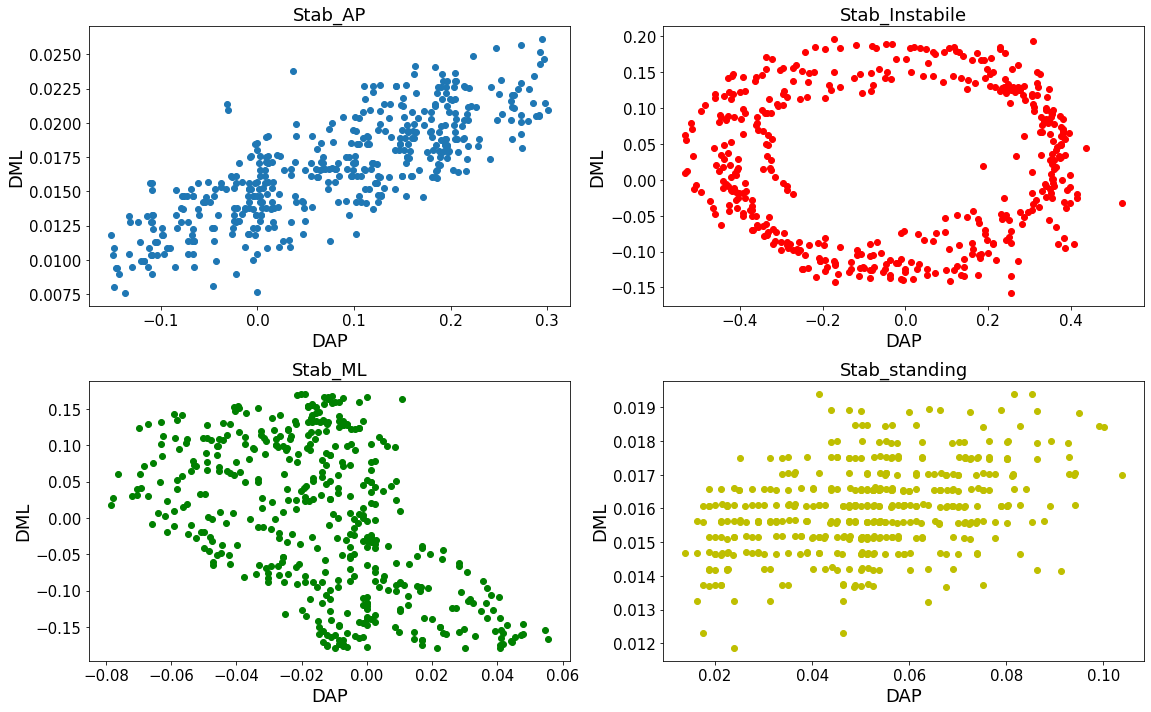

In [3]:
# Plot 2x2 subplots
# %matplotlib

fig, axs = plt.subplots(2, 2, figsize=(16,10))
axs[0, 0].scatter(stab_ap[:,0], stab_ap[:,1])
axs[0, 0].set_title('Stab_AP', fontsize=12)
axs[0,0].set_xlabel('DAP', fontsize=12)
axs[0,0].set_ylabel('DML', fontsize=18)
axs[0,0].tick_params(axis='both', labelsize=15)

axs[0, 1].scatter(stab_instabile[:,0], stab_instabile[:,1], c='r')
axs[0, 1].set_title('Stab_Instabile',fontsize=18)
axs[0, 1].set_xlabel('DAP', fontsize=18)
axs[0, 1].set_ylabel('DML', fontsize=18)
axs[0, 1].tick_params(axis='both', labelsize=15)

axs[1, 0].scatter(stab_ml[:,0], stab_ml[:,1], c='g')
axs[1, 0].set_title('Stab_ML', fontsize=18)
axs[1, 0].set_xlabel('DAP', fontsize=18)
axs[1, 0].set_ylabel('DML', fontsize=18)
axs[1, 0].tick_params(axis='both', labelsize=15)

axs[1, 1].scatter(stab_standing[:,0], stab_standing[:,1], c='y')
axs[1, 1].set_title('Stab_standing',fontsize=18)
axs[1, 1].set_xlabel('DAP', fontsize=18)
axs[1, 1].set_ylabel('DML', fontsize=18)
axs[1, 1].tick_params(axis='both', labelsize=15)
plt.tight_layout()

## Plot Stabilograms - Line Plot

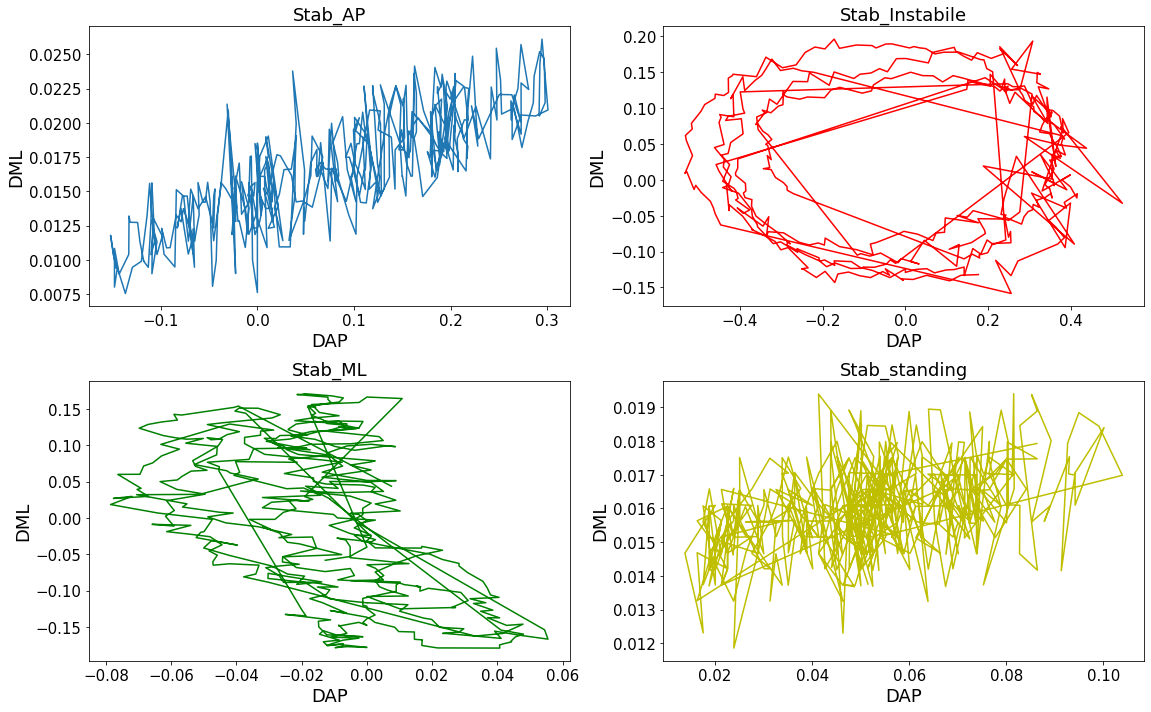

In [3]:
# Plot 2x2 subplots
# %matplotlib

fig, axs = plt.subplots(2, 2, figsize=(16,10))
axs[0, 0].plot(stab_ap[:,0], stab_ap[:,1])
axs[0, 0].set_title('Stab_AP', fontsize=18)
axs[0,0].set_xlabel('DAP', fontsize=18)
axs[0,0].set_ylabel('DML', fontsize=18)
axs[0,0].tick_params(axis='both', labelsize=15)

axs[0, 1].plot(stab_instabile[:,0], stab_instabile[:,1], c='r')
axs[0, 1].set_title('Stab_Instabile',fontsize=18)
axs[0, 1].set_xlabel('DAP', fontsize=18)
axs[0, 1].set_ylabel('DML', fontsize=18)
axs[0, 1].tick_params(axis='both', labelsize=15)

axs[1, 0].plot(stab_ml[:,0], stab_ml[:,1], c='g')
axs[1, 0].set_title('Stab_ML', fontsize=18)
axs[1, 0].set_xlabel('DAP', fontsize=18)
axs[1, 0].set_ylabel('DML', fontsize=18)
axs[1, 0].tick_params(axis='both', labelsize=15)

axs[1, 1].plot(stab_standing[:,0], stab_standing[:,1], c='y')
axs[1, 1].set_title('Stab_standing',fontsize=18)
axs[1, 1].set_xlabel('DAP', fontsize=18)
axs[1, 1].set_ylabel('DML', fontsize=18)
axs[1, 1].tick_params(axis='both', labelsize=15)
plt.tight_layout()

## Seperataly Plot DAP-DML for each dynamic

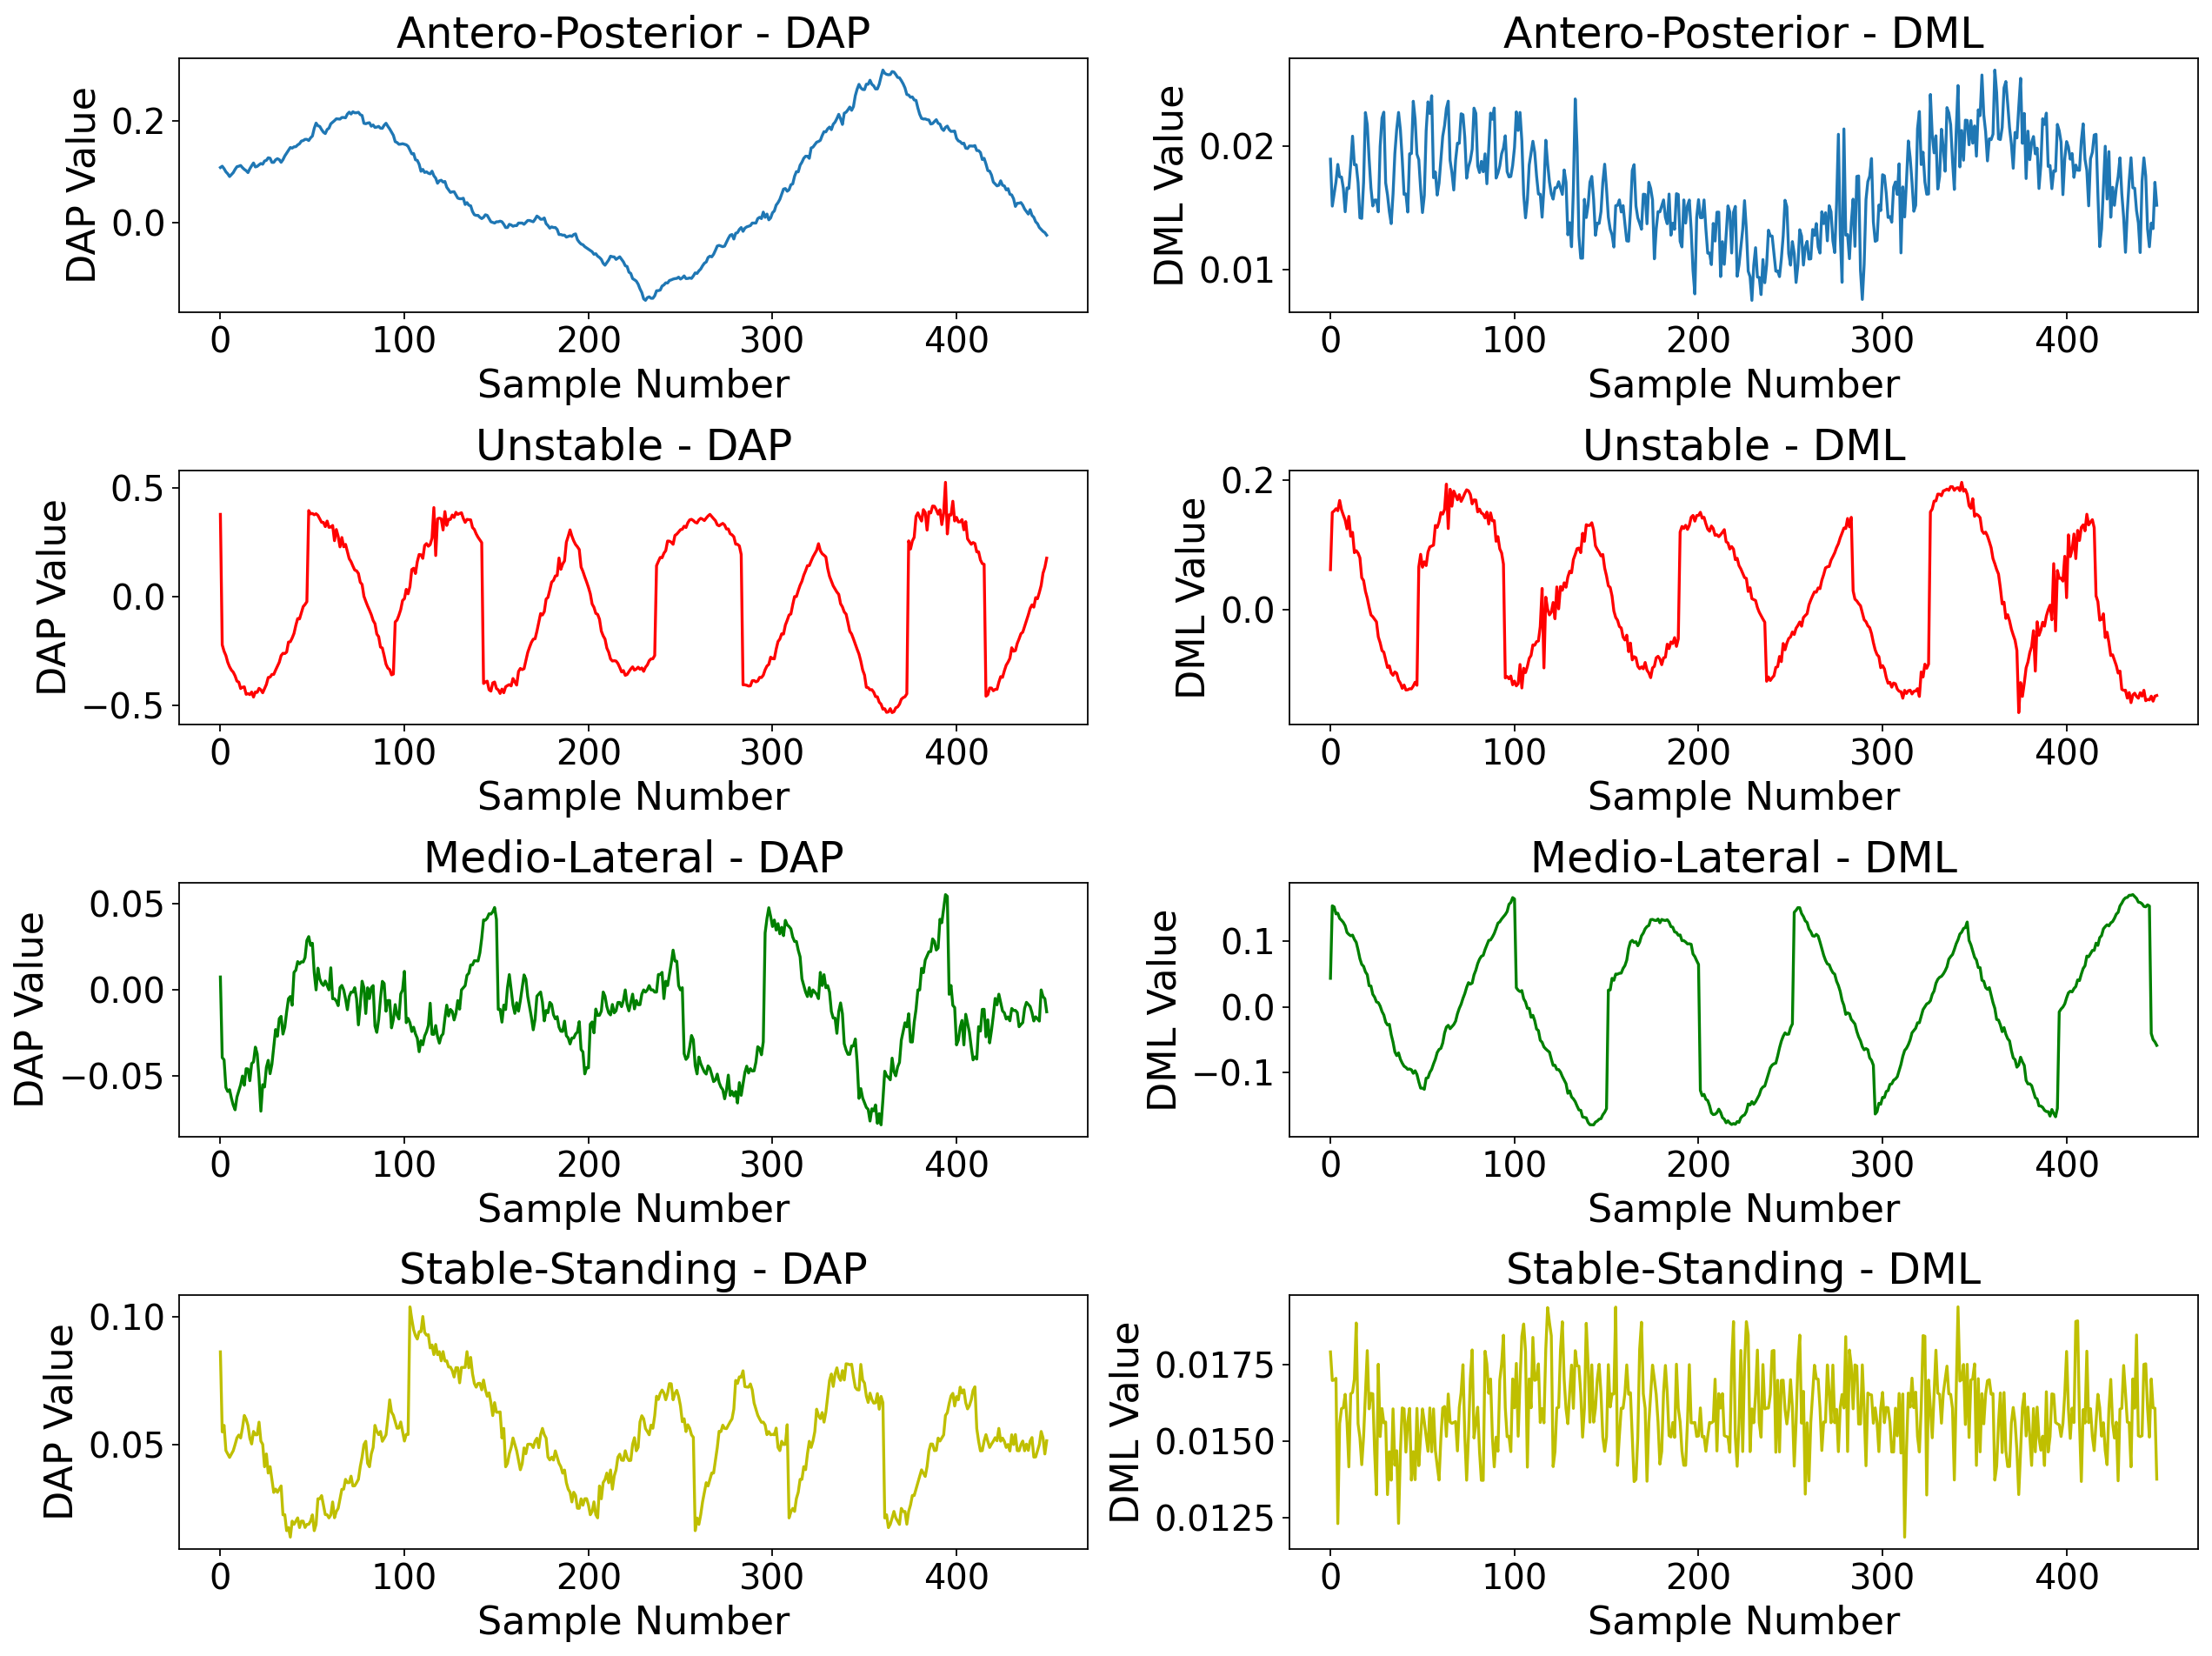

In [18]:
# Plot 2x2 subplots
# %matplotlib
# %matplotlib
fig, axs = plt.subplots(4, 2, figsize=(16,12), dpi=160)
f1=22
f2=20
f3=18
axs[0, 0].plot(stab_ap[:,0])
axs[0, 0].set_title('Antero-Posterior - DAP', fontsize=f1)
axs[0,0].set_xlabel('Sample Number', fontsize=f2)
axs[0,0].set_ylabel('DAP Value', fontsize=f2)
axs[0,0].tick_params(axis='both', labelsize=f3)

axs[0,1].plot(stab_ap[:,1])
axs[0,1].set_title('Antero-Posterior - DML',fontsize=f1)
axs[0,1].set_xlabel('Sample Number', fontsize=f2)
axs[0,1].set_ylabel('DML Value', fontsize=f2)
axs[0,1].tick_params(axis='both', labelsize=f3)

axs[1, 0].plot(stab_instabile[:,0], c='r')
axs[1, 0].set_title('Unstable - DAP',fontsize=f1)
axs[1,0].set_xlabel('Sample Number', fontsize=f2)
axs[1,0].set_ylabel('DAP Value', fontsize=f2)
axs[1,0].tick_params(axis='both', labelsize=f3)



axs[1,1].plot(stab_instabile[:,1], c='r')
axs[1,1].set_title('Unstable - DML',fontsize=f1)
axs[1,1].set_xlabel('Sample Number', fontsize=f2)
axs[1,1].set_ylabel('DML Value', fontsize=f2)
axs[1,1].tick_params(axis='both', labelsize=f3)



axs[2, 0].plot(stab_ml[:,0], c='g')
axs[2, 0].set_title('Medio-Lateral - DAP',fontsize=f1)
axs[2,0].set_xlabel('Sample Number', fontsize=f2)
axs[2,0].set_ylabel('DAP Value', fontsize=f2)
axs[2,0].tick_params(axis='both', labelsize=f3)



axs[2,1].plot(stab_ml[:,1], c='g')
axs[2,1].set_title('Medio-Lateral - DML',fontsize=f1)
axs[2,1].set_xlabel('Sample Number', fontsize=f2)
axs[2,1].set_ylabel('DML Value', fontsize=f2)
axs[2,1].tick_params(axis='both', labelsize=f3)


axs[3, 0].plot(stab_standing[:,0], c='y')
axs[3, 0].set_title('Stable-Standing - DAP',fontsize=f1)
axs[3,0].set_xlabel('Sample Number', fontsize=f2)
axs[3,0].set_ylabel('DAP Value', fontsize=f2)
axs[3,0].tick_params(axis='both', labelsize=f3)


axs[3,1].plot(stab_standing[:,1], c='y')
axs[3,1].set_title('Stable-Standing - DML',fontsize=f1)
axs[3,1].set_xlabel('Sample Number', fontsize=f2)
axs[3,1].set_ylabel('DML Value', fontsize=f2)
axs[3,1].tick_params(axis='both', labelsize=f3)
## Set horizontal space between subplots
# plt.subplots_adjust(hspace=0.1)
# ## Set vertical space between subplots
# plt.subplots_adjust(wspace=0.1)
plt.tight_layout()

## Concatenate data and plot 

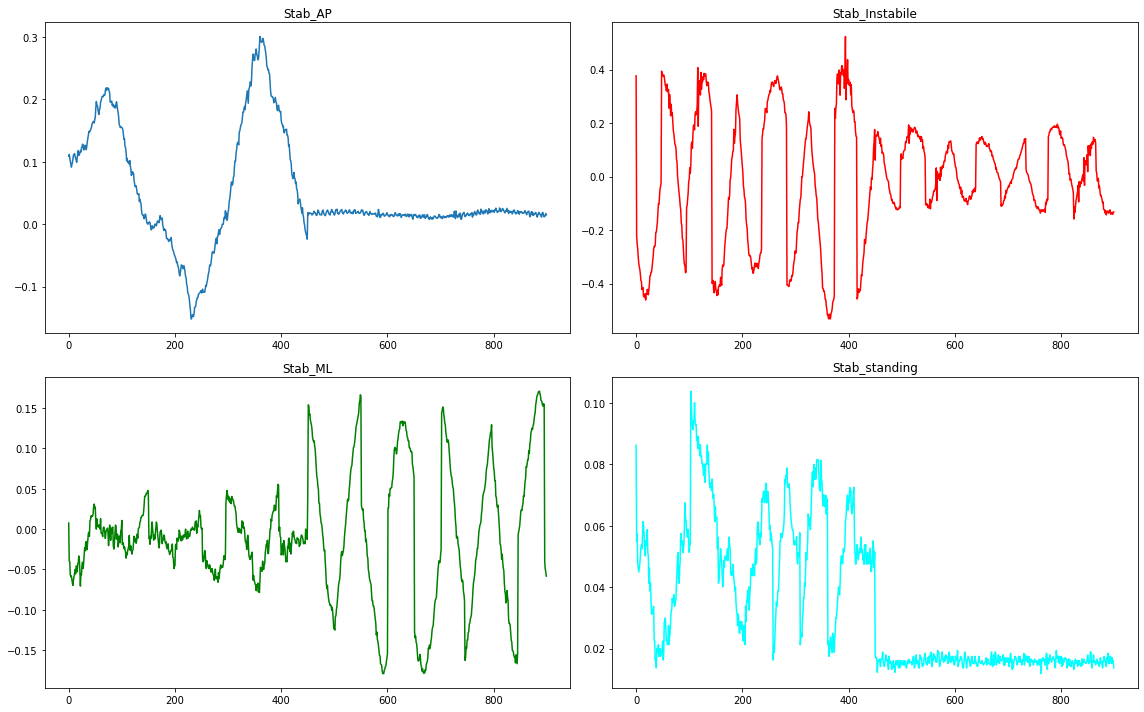

In [7]:
test_stab = np.concatenate((stab_ap[:,0],stab_ap[:,1]), axis=0)
test_ml = np.concatenate((stab_ml[:,0],stab_ml[:,1]), axis=0)
test_instabile = np.concatenate((stab_instabile[:,0],stab_instabile[:,1]), axis=0)
test_standing = np.concatenate((stab_standing[:,0],stab_standing[:,1]), axis=0)
# %matplotlib
fig, axs = plt.subplots(2, 2, figsize=(16,10))
axs[0, 0].plot(test_stab)
axs[0, 0].set_title('Stab_AP')
axs[0, 1].plot(test_instabile, c='r')
axs[0, 1].set_title('Stab_Instabile')
axs[1, 0].plot(test_ml, c='g')
axs[1, 0].set_title('Stab_ML')
axs[1, 1].plot(test_standing, c='cyan')
axs[1, 1].set_title('Stab_standing')
plt.tight_layout()

## Scatter Plot all dynamics in one plot

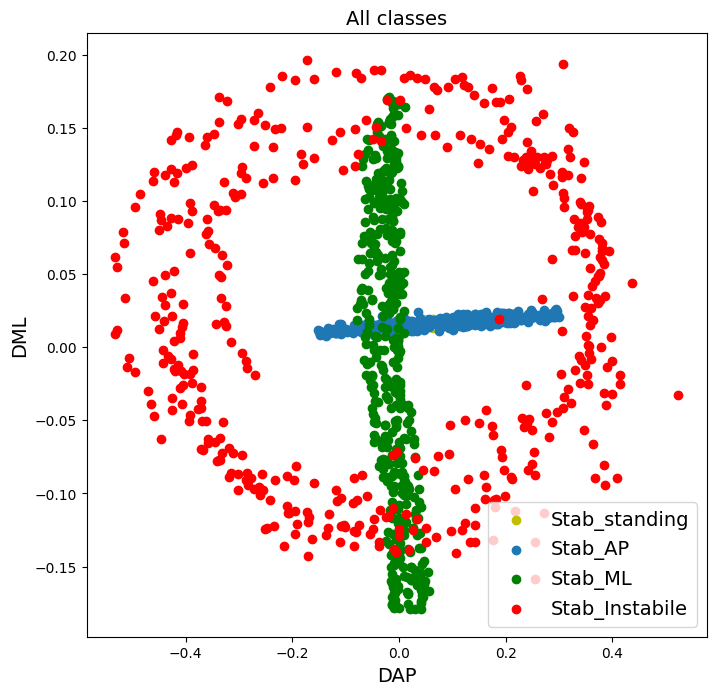

In [39]:
# Plot 2x2 subplots
# %matplotlib
fig = plt.figure(figsize=(8,8), dpi=100)
plt.scatter(stab_standing[:,0], stab_standing[:,1], c='y')
plt.scatter(stab_ap[:,0], stab_ap[:,1])
plt.scatter(stab_ml[:,0], stab_ml[:,1], c='g')
plt.scatter(stab_instabile[:,0], stab_instabile[:,1], c='r')
plt.legend(classes, fontsize=14)
plt.title('All classes', fontsize=14)
plt.xlabel('DAP', fontsize=14)
plt.ylabel('DML', fontsize=14)
plt.show()

## Import libraries for training and select GPU

In [2]:
from sklearn.model_selection import train_test_split
import random
import tensorflow as tf
import numpy as np
import pathlib

# Using GPU
import os
import scipy.io as scpy
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0'  # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


## Structure data for training, test and validation
    Here the dataset is structured in way that both DAP and DML are considered as different inputs.
    This is the first method.

In [11]:
x_data = input_data
y_data = output_data
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# split into train test sets
x_train, x_val_to_use, y_train, y_val_to_use = train_test_split(x_data, y_data, test_size=0.3,random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_val_to_use, y_val_to_use, test_size=0.5,random_state=SEED)

print(f" {len(x_train), len(x_val), len(x_test)}")
print(f" {len(y_train), len(y_val), len(y_test)}")

 (700, 150, 150)
 (700, 150, 150)


## Try a simple dense model

In [11]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu',input_shape=(450,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax')
])


dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
dense_model.summary()              

history=dense_model.fit(train_dataset,validation_data=val_dataset, epochs=100,verbose=1)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5),dpi=80)
ax = fig.add_subplot(111)
ax.plot(history.history['loss'], linewidth=2)
ax.plot(history.history['accuracy'],linewidth=2)
ax.plot(history.history['val_accuracy'],linewidth=2)
ax.plot(history.history['val_loss'],linewidth=2)
ax.grid(True)
ax.set_ylabel('Loss & Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.legend(['training_loss', 'training_accuracy', 'val_accuracy', 'val_loss'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating dense_model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")

plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 51)                23001     
                                                                 
 dense_7 (Dense)             (None, 4)                 208       
                                                                 
 dense_8 (Dense)             (None, 4)                 20        
                                                                 
Total params: 23,229
Trainable params: 23,229
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
44/44 [==============================] - 1s 2ms/step - loss: 1.1978 - accuracy: 0.4850 - val_loss: 1.0967 - val_accuracy: 0.5467
Epoch 2/100
44/44 [==============================] - 0s 1ms/step - loss: 0.9935 - accuracy: 0.5964 - val_loss: 0.9817 - val_accuracy: 0.5967
Epoch 3/100
44/44 [=============

### EVALUATE THE MODEL

In [12]:
dense_model.evaluate(x_test, y_test, verbose=1)

10/10 [==============================] - 0s 1ms/step - loss: 0.7503 - accuracy: 0.8500


[0.7502817511558533, 0.8500000238418579]

## Try the CNN Model with 1D Convolution

Model: "conv_model_paper"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 444, 32)           256       
                                                                 
 batch_normalization (BatchN  (None, 444, 32)          128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 444, 32)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 55, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 51, 48)            7728      
                                                                 
 batch_normalization_1 (Batc  (None, 51, 48)      

2023-01-27 16:05:02.508190: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8500


44/44 [==============================] - 2s 6ms/step - loss: 2.3624 - accuracy: 0.2750 - val_loss: 1.3634 - val_accuracy: 0.2933
Epoch 2/100
44/44 [==============================] - 0s 3ms/step - loss: 1.8110 - accuracy: 0.3493 - val_loss: 1.3868 - val_accuracy: 0.3167
Epoch 3/100
44/44 [==============================] - 0s 3ms/step - loss: 1.4692 - accuracy: 0.4979 - val_loss: 1.4172 - val_accuracy: 0.2733
Epoch 4/100
44/44 [==============================] - 0s 3ms/step - loss: 1.2218 - accuracy: 0.5764 - val_loss: 1.4673 - val_accuracy: 0.2867
Epoch 5/100
44/44 [==============================] - 0s 3ms/step - loss: 1.1741 - accuracy: 0.5800 - val_loss: 1.5017 - val_accuracy: 0.3033
Epoch 6/100
44/44 [==============================] - 0s 3ms/step - loss: 1.0840 - accuracy: 0.5950 - val_loss: 1.5017 - val_accuracy: 0.3167
Epoch 7/100
44/44 [==============================] - 0s 3ms/step - loss: 1.0532 - accuracy: 0.5979 - val_loss: 1.4765 - val_accuracy: 0.3300
Epoch 8/100
44/44 [======

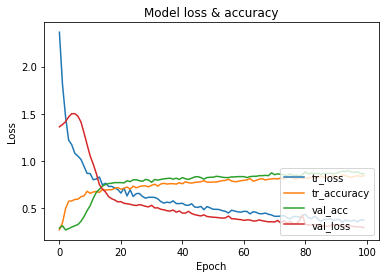

In [17]:
model = tf.keras.Sequential(name='conv_model_paper')
model.add(tf.keras.layers.InputLayer(input_shape=(450,1)))
model.add(tf.keras.layers.Conv1D(32,7))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=8))
model.add(tf.keras.layers.Conv1D(48,5))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=4))
model.add(tf.keras.layers.MaxPooling1D(pool_size=4))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

print(model.summary())
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train,y_train, epochs=100, validation_data=(x_val,y_test), verbose=1)   


# Plotting accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])


plt.title('Model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['tr_loss', 'tr_accuracy', 'val_acc', 'val_loss'], loc='lower right')
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")


plt.show()

## PYCARET - AUTO ML CLASSIFICATION TEST

In [17]:
from pycaret.classification import *
s = setup(x_data, target = y_data)

In [18]:
best = compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [49]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Let's Concatenate DAP and DML and try again

In [1]:
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# root_dir = 'C:/Users/101/repos/postural_sway_analysis/data/'

classes = ['Stab_standing','Stab_AP','Stab_ML','Stab_Instabile']

min_len = 450
input_data = np.zeros((1,min_len*2))
output_data = []
min_file_name = ''
for filename in glob.iglob('./data/Case_*/**/*.txt', recursive=True):
    # print(filename)
    temp_data = np.loadtxt(filename)
    temp_data = temp_data[:min_len]
    concat_data = np.concatenate((temp_data[:,0],temp_data[:,1]), axis=0)
    if classes[0] in filename:
        stab_standing = temp_data
        output_data = np.append(output_data, 0)
    if classes[1] in filename:
        stab_ap = temp_data
        output_data = np.append(output_data, 1)
    if classes[2] in filename:
        stab_ml = temp_data
        output_data = np.append(output_data, 2)
    if classes[3] in filename:
        stab_instabile = temp_data
        output_data = np.append(output_data, 3)
    concat_data = np.reshape(concat_data, (1,concat_data.shape[0]))    
    input_data = np.append(input_data, concat_data,axis=0)
    input_data = np.float32(input_data)
input_data = np.delete(input_data, 0, axis=0)
print(f"Input data shape  : {input_data.shape}")
print(f"Output data shape : {output_data.shape}")

Input data shape  : (1000, 900)
Output data shape : (1000,)


In [3]:
import miun_utils as miun
SEED = 12312323
miun.use_gpu()
miun.fix_seed(SEED)
model = miun.dense_model((900,), 4, 12, 4)
x_train, x_val, x_test, y_train, y_val, y_test = miun.split_data(input_data, output_data, 0.15, 0.15, SEED)


1 Physical GPUs, 1 Logical GPUs


In [12]:
import torch
torch_model = miun.FCN(900, 4, 12, 4)
optimizer = torch.optim.Adam(torch_model.parameters(),lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()
files = []
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
input_data = torch.tensor(input_data, dtype=torch.float32)
output_data = torch.tensor(output_data, dtype=torch.float32)

for i in range(1000):
    optimizer.zero_grad()
    yh = torch_model(x_train)
    loss = loss_fn(yh, y_train)
    loss.backward()
    optimizer.step()


/tmp/ipykernel_247957/1997406374.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(x_train, dtype=torch.float32)
/tmp/ipykernel_247957/1997406374.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
/tmp/ipykernel_247957/1997406374.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_data = torch.tensor(input_data, dtype=torch.float32)
/tmp/ipykernel_247957/1997406374.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clon

In [30]:
epochs = 100
batch_size = 32
learning_rate = 1e-3
history = miun.train_dense_model(model, x_train, y_train, x_val, y_val, epochs, batch_size, learning_rate)

Epoch 1/100
23/23 [==============================] - 1s 4ms/step - loss: 1.2841 - accuracy: 0.3920 - val_loss: 1.1585 - val_accuracy: 0.5391
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 1.1658 - accuracy: 0.5679 - val_loss: 1.0689 - val_accuracy: 0.6406
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 1.0780 - accuracy: 0.6482 - val_loss: 0.9958 - val_accuracy: 0.7109
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.9939 - accuracy: 0.6925 - val_loss: 0.9367 - val_accuracy: 0.7266
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.9111 - accuracy: 0.7424 - val_loss: 0.8863 - val_accuracy: 0.7578
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.8329 - accuracy: 0.7756 - val_loss: 0.8307 - val_accuracy: 0.7422
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.7630 - accuracy: 0.7992 - val_loss: 0.7776 - val_accuracy: 0.7578
Epoch 8/100
2

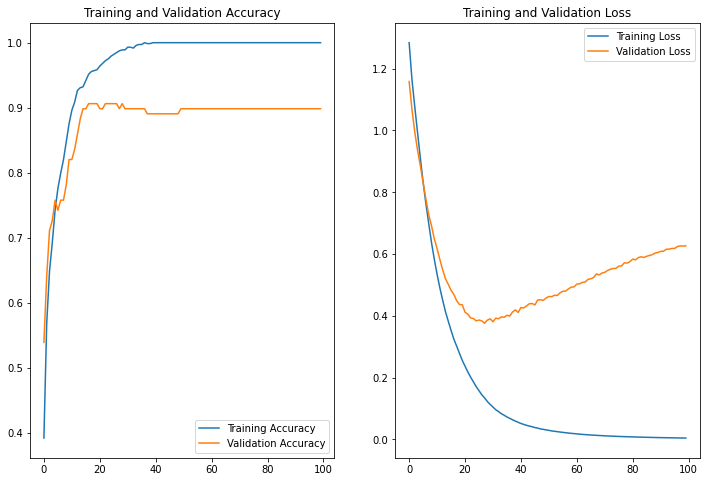

In [31]:
miun.plot_history(history)

In [14]:
classes = ['Stab_standing','Stab_AP','Stab_ML','Stab_Instabile']
miun.plot_roc_curve(model, x_test, y_test, classes)

5/5 [==============================] - 0s 853us/step


5/5 [==============================] - 0s 752us/step


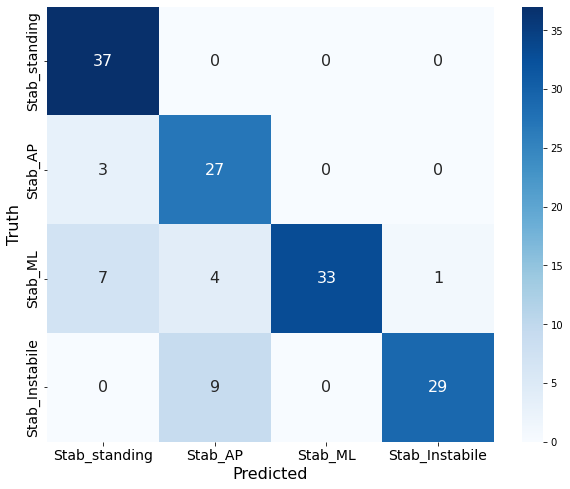

In [15]:
miun.plot_confusion_matrix(model, x_test, y_test, classes)

In [18]:
miun.get_performance_metrics(model,history, x_test, y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.6851 - accuracy: 0.8400
Training accuracy: 0.8933517932891846
Training loss: 0.5506492853164673
Validation accuracy: 0.8203125
Validation loss: 0.6674324870109558
Test accuracy: 0.8399999737739563
Test loss: 0.6851409077644348


In [19]:
miun.get_sklearn_metrics(model, x_test, y_test)

5/5 [==============================] - 0s 826us/step
Classification report:
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88        37
         1.0       0.68      0.90      0.77        30
         2.0       1.00      0.73      0.85        45
         3.0       0.97      0.76      0.85        38

    accuracy                           0.84       150
   macro avg       0.86      0.85      0.84       150
weighted avg       0.87      0.84      0.84       150



## Train - Validation - Test Split

In [32]:
from sklearn.model_selection import train_test_split
import random
import tensorflow as tf
import numpy as np
import pathlib
import os
x_data = input_data
y_data = output_data
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# split into train test sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3,random_state=SEED)

print(f" {len(x_train), len(x_test)}")
print(f" {len(y_train), len(y_test)}")


 (700, 300)
 (700, 300)


In [159]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(
                      min_samples_split=3,
                      n_estimators=10,
                      bootstrap=True,
                      n_jobs=-1,
                      random_state=0,
                      max_features='sqrt')

rf_classifier.fit(x_train, y_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = rf_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
plt.figure(figsize=(8,6), dpi=90)

ax=plt.subplot(111)
# plt.title("Confusion Matrix", fontsize=15)
labels = classes
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 12},ax=ax, square=True)
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticklabels(labels, fontsize=10)
ax.set_xlabel("Predicted Label", fontsize=10)
ax.set_ylabel("True Label", fontsize=10)
# ax.patch.set_edgecolor('black')
# ax.patch.set_linewidth('2')
plt.tight_layout()
import sklearn.metrics as metrics

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred,digits=4))


0.99
              precision    recall  f1-score   support

         0.0     0.9861    1.0000    0.9930        71
         1.0     1.0000    1.0000    1.0000        75
         2.0     0.9747    0.9872    0.9809        78
         3.0     1.0000    0.9737    0.9867        76

    accuracy                         0.9900       300
   macro avg     0.9902    0.9902    0.9901       300
weighted avg     0.9901    0.9900    0.9900       300



In [160]:
from sklearn.ensemble import ExtraTreesClassifier
ex_classifier = ExtraTreesClassifier(
                      n_estimators=10,
                      random_state=0)

ex_classifier.fit(x_train, y_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = ex_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
plt.figure(figsize=(8,6), dpi=90)

ax=plt.subplot(111)
# plt.title("Confusion Matrix", fontsize=15)
labels = classes
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 12},ax=ax, square=True)
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticklabels(labels, fontsize=10)
ax.set_xlabel("Predicted Label", fontsize=10)
ax.set_ylabel("True Label", fontsize=10)
# ax.patch.set_edgecolor('black')
# ax.patch.set_linewidth('2')
plt.tight_layout()
import sklearn.metrics as metrics

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred,digits=4))


0.99
              precision    recall  f1-score   support

         0.0     0.9726    1.0000    0.9861        71
         1.0     1.0000    0.9867    0.9933        75
         2.0     0.9872    0.9872    0.9872        78
         3.0     1.0000    0.9868    0.9934        76

    accuracy                         0.9900       300
   macro avg     0.9899    0.9902    0.9900       300
weighted avg     0.9902    0.9900    0.9900       300



## PYCARET - AUTO ML CLASSIFICATION TEST

In [20]:
from pycaret.classification import *
s = setup(x_data, target = y_data)

In [22]:
best = compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [72]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Prepare data for dense model training

In [33]:
x_data = input_data
y_data = output_data
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# split into train test sets
x_train, x_val_to_use, y_train, y_val_to_use = train_test_split(x_data, y_data, test_size=0.3,random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_val_to_use, y_val_to_use, test_size=0.5,random_state=SEED)

print(f" {len(x_train), len(x_val), len(x_test)}")
print(f" {len(y_train), len(y_test), len(y_test)}")

 (700, 150, 150)
 (700, 150, 150)


## Try a simple dense model

In [64]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu',input_shape=(900,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax')
])

initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=25,
    decay_rate=0.8,
    staircase=True)

decay_steps = 1000
lr_decayed_fn = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate, decay_steps, alpha=0.0001)
dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
dense_model.summary()              

history=dense_model.fit(train_dataset,validation_data=val_dataset, epochs=100,verbose=1)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5),dpi=80)
ax = fig.add_subplot(111)
ax.plot(history.history['loss'], linewidth=2)
ax.plot(history.history['accuracy'],linewidth=2)
ax.plot(history.history['val_accuracy'],linewidth=2)
ax.plot(history.history['val_loss'],linewidth=2)
ax.grid(True)
ax.set_ylabel('Loss & Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.legend(['training_loss', 'training_accuracy', 'val_accuracy', 'val_loss'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating dense_model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")

plt.show()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 20)                18020     
                                                                 
 dense_115 (Dense)           (None, 4)                 84        
                                                                 
 dense_116 (Dense)           (None, 4)                 20        
                                                                 
Total params: 18,124
Trainable params: 18,124
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
22/22 [==============================] - 0s 4ms/step - loss: 1.2861 - accuracy: 0.4514 - val_loss: 1.2212 - val_accuracy: 0.4867
Epoch 2/100
22/22 [==============================] - 0s 1ms/step - loss: 1.0887 - accuracy: 0.5829 - val_loss: 1.0765 - val_accuracy: 0.5467
Epoch 3/100
22/22 [============

In [50]:
dense_model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.3121 - accuracy: 0.9400


[0.3120739758014679, 0.9399999976158142]

In [102]:
## Write the same dense model using pytorch
import torch
import torch.nn as nn
## fix the random seed
torch.manual_seed(99)

class DenseModel(nn.Module):
    def __init__(self):
        super(DenseModel, self).__init__()
        self.fc1 = nn.Linear(900, 12)
        self.fc2 = nn.Linear(12, 8)
        self.fc3 = nn.Linear(8, 4)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x

dense_model = DenseModel()
print(dense_model)
### Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(dense_model.parameters(), lr=0.001)



DenseModel(
  (fc1): Linear(in_features=900, out_features=12, bias=True)
  (fc2): Linear(in_features=12, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=4, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)


In [96]:
### Define the training and validation function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs,device):
    train_loss = []
    train_acc = []
    val_loss = []
    val_acc = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0
        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
                       
            loss.backward()
            optimizer.step()
            _, preds = torch.max(outputs, 1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        train_loss.append(epoch_loss)
        train_acc.append(epoch_acc)
        model.eval()
        running_loss = 0.0
        running_corrects = 0
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
        epoch_loss = running_loss / len(val_loader.dataset)
        epoch_acc = running_corrects.double() / len(val_loader.dataset)
        val_loss.append(epoch_loss)
        val_acc.append(epoch_acc)
        print('Epoch {}/{} - Train Loss: {:.4f} - Train Acc: {:.4f} - Val Loss: {:.4f} - Val Acc: {:.4f}'.format(epoch+1, num_epochs, train_loss[-1], train_acc[-1], val_loss[-1], val_acc[-1]))
    train_acc = [t.cpu().numpy() for t in train_acc]
    val_acc = [t.cpu().numpy() for t in val_acc]
    return train_loss, train_acc, val_loss, val_acc

### Define the test function
def test_model(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
    epoch_loss = running_loss / len(test_loader.dataset)
    epoch_acc = running_corrects.double() / len(test_loader.dataset)
    print('Test Loss: {:.4f} - Test Acc: {:.4f}'.format(epoch_loss, epoch_acc))
    return epoch_loss, epoch_acc

### Train the model
### Create the data loaders


In [97]:
# Convert the data to tensors
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()
x_val = torch.from_numpy(x_val).float()
y_val = torch.from_numpy(y_val).long()
x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).long()

TypeError: expected np.ndarray (got Tensor)

In [106]:
## Fix the random seed
torch.manual_seed(99)
dense_model = DenseModel()
print(dense_model)
### Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(dense_model.parameters(), lr=0.001)
train_dataset = torch.utils.data.TensorDataset(x_train, y_train)
val_dataset = torch.utils.data.TensorDataset(x_val, y_val)
test_dataset = torch.utils.data.TensorDataset(x_test, y_test)
### Create the data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
dense_model.to(device)
train_loss, train_acc, val_loss, val_acc = train_model(dense_model, train_loader, val_loader, criterion, optimizer, 100, device)


DenseModel(
  (fc1): Linear(in_features=900, out_features=12, bias=True)
  (fc2): Linear(in_features=12, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=4, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)
Epoch 1/100 - Train Loss: 1.3970 - Train Acc: 0.2486 - Val Loss: 1.3810 - Val Acc: 0.2333
Epoch 2/100 - Train Loss: 1.3845 - Train Acc: 0.2486 - Val Loss: 1.3738 - Val Acc: 0.2333
Epoch 3/100 - Train Loss: 1.3750 - Train Acc: 0.3214 - Val Loss: 1.3635 - Val Acc: 0.4067
Epoch 4/100 - Train Loss: 1.3628 - Train Acc: 0.4314 - Val Loss: 1.3472 - Val Acc: 0.4400
Epoch 5/100 - Train Loss: 1.3448 - Train Acc: 0.4586 - Val Loss: 1.3257 - Val Acc: 0.4200
Epoch 6/100 - Train Loss: 1.3220 - Train Acc: 0.4800 - Val Loss: 1.2985 - Val Acc: 0.4800
Epoch 7/100 - Train Loss: 1.2931 - Train Acc: 0.5457 - Val Loss: 1.2665 - Val Acc: 0.5333
Epoch 8/100 - Train Loss: 1.2597 - Train Acc: 0.6000 - Val Loss: 1.2281 - Val Acc: 0.5667
Epoch 9/100 - Train Loss: 1.2205 - Train Ac

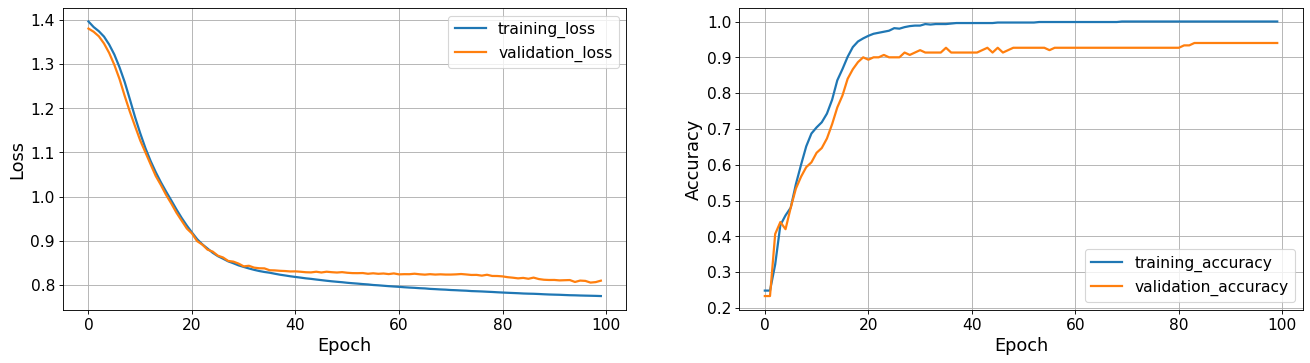

In [107]:
## Plot the loss and accuracy of a torch model training
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,5),dpi=80)
## show the loss and accuracy in two subplots
ax = fig.add_subplot(1,2,1)
ax.plot(train_loss, linewidth=2)
ax.grid(True)
ax.set_ylabel('Loss', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.plot(val_loss, linewidth=2)
plt.legend(['training_loss', 'validation_loss'], bbox_to_anchor=(1, 1), loc='upper right', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax = fig.add_subplot(1,2,2)
#train_acc = [t.cpu().numpy() for t in train_acc]
#val_acc = [t.cpu().numpy() for t in val_acc]
ax.plot(train_acc, linewidth=2)
ax.plot(val_acc, linewidth=2)
plt.legend(['training_accuracy', 'validation_accuracy'],  loc='lower right', fontsize=14)
ax.grid(True)
ax.set_ylabel('Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Try a convolutional model

Model: "conv_model_paper"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Reshape (Reshape)           (None, 900, 1, 1)         0         
                                                                 
 conv2d_34 (Conv2D)          (None, 900, 1, 4)         68        
                                                                 
 activation_36 (Activation)  (None, 900, 1, 4)         0         
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 225, 1, 4)        0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 225, 1, 4)         260       
                                                                 
 activation_37 (Activation)  (None, 225, 1, 4)         0         
                                                  

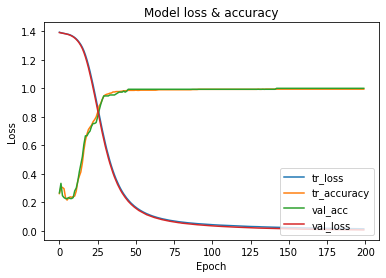

In [97]:
model = tf.keras.Sequential(name='conv_model_paper')
model.add(tf.keras.layers.Reshape((900,1,1),name='Reshape', input_shape=(900,)))
model.add(tf.keras.layers.Conv2D(4,4, padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=4, padding='same'))
model.add(tf.keras.layers.Conv2D(4,4, padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=4, padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(4))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

print(model.summary())
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train,y_train, epochs=200, validation_data=(x_val,y_val), verbose=1)   


# Plotting accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])


plt.title('Model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['tr_loss', 'tr_accuracy', 'val_acc', 'val_loss'], loc='lower right')
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")


plt.show()

In [98]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.0148 - accuracy: 0.9933


[0.014791817404329777, 0.9933333396911621]

### Convert it to TF Lite model

In [99]:
dense_model = model
float_converter = tf.lite.TFLiteConverter.from_keras_model(dense_model)
float_tflite_model = float_converter.convert()
tflite_model_file = pathlib.Path('conv_model.tflite')
tflite_model_file.write_bytes(float_tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmptnbavizx/assets


INFO:tensorflow:Assets written to: /tmp/tmptnbavizx/assets
2023-02-17 15:54:45.953349: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-02-17 15:54:45.986406: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: /tmp/tmptnbavizx
2023-02-17 15:54:45.994690: I tensorflow/cc/saved_model/loader.cc:305] SavedModel load for tags { serve }; Status: success: OK. Took 47410 microseconds.


13876

### Convert it to C++ model

In [100]:
!xxd -i conv_model.tflite > conv_model.cc

### Quantize the model and save as TFLite

In [101]:
def representative_data_gen():
  for input_value in tf.data.Dataset.from_tensor_slices(x_train).batch(1).take(100):
    # Model has only one input so each data point has one element.
    yield [input_value]
converter = tf.lite.TFLiteConverter.from_keras_model(dense_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
tflite_model_quant = converter.convert()

tflite_model_file = pathlib.Path('conv_model_quantized.tflite')
tflite_model_file.write_bytes(tflite_model_quant)

INFO:tensorflow:Assets written to: /tmp/tmp0eu701zb/assets


INFO:tensorflow:Assets written to: /tmp/tmp0eu701zb/assets
/home/veysiadn/anaconda3/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:765: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
2023-02-17 15:56:42.677301: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-02-17 15:56:42.705967: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: /tmp/tmp0eu701zb
2023-02-17 15:56:42.712623: I tensorflow/cc/saved_model/loader.cc:305] SavedModel load for tags { serve }; Status: success: OK. Took 40046 microseconds.
fully_quantize: 0, inference_type: 6, input_inference_type: FLOAT32, output_inference_type: FLOAT32


8448

### Convert it to C++ CODE

In [102]:
!xxd -i conv_model_quantized.tflite > conv_model_quantized.cc

### Run TF Lite Model

In [25]:
# Helper function to run inference on a TFLite model
def run_tflite_model(tflite_file, indices):
  # Initialize the interpreter
  interpreter = tf.lite.Interpreter(model_path=str(tflite_file))
  interpreter.allocate_tensors()

  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]

  predictions = 0
  for i, index in enumerate(indices):
    test_data = x_test[index]
    test_data=np.expand_dims(test_data, axis=0)
    test_labels = y_test[index]

    interpreter.set_tensor(input_details["index"],test_data)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details["index"])[0]
    print(output[0])
    print(output[1])
    print(output[2])
    predictions = output.argmax()

  return predictions

In [26]:
import matplotlib.pylab as plt
tflite_model_file = 'dense_model.tflite'
# Change this to test a different image
indice = 333

## Helper function to test the models on one image
def test_model(tflite_file, indice, model_type):

  predictions = run_tflite_model(tflite_file, [indice])

  print(f" Model \n True:{y_test[indice]}, Predicted:{predictions}")
  
test_model(tflite_model_file, indice, model_type="Float")

0.99966025
0.00020287636
0.00012663561
 Model 
 True:0.0, Predicted:0


### Evaluate the quantized model

In [30]:
import numpy as np

def run_tflite_model_for_eval(interpreter, indices):
  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]

  predictions = 0
  for i, index in enumerate(indices):
    test_data = x_test[index]
    test_data=np.expand_dims(test_data, axis=0)

    interpreter.set_tensor(input_details["index"], test_data)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details["index"])[0]
    predictions = output.argmax()
  return predictions
  
def evaluate_model(interpreter):
  output_predictions =[]
  for i in range(len(x_test)):
    output_predictions.append(run_tflite_model_for_eval(interpreter,[i]))
  output_predictions = np.array(output_predictions)
  accuracy = (output_predictions == y_test).mean()
  return accuracy

In [31]:
interpreter = tf.lite.Interpreter(model_path='dense_model_quantized.tflite')
interpreter.allocate_tensors()

test_accuracy = evaluate_model(interpreter)

print('Optimized dense_model TFLite test_accuracy:', test_accuracy)

Optimized dense_model TFLite test_accuracy: 1.0


### Try Case based training and testing split

In [103]:
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# root_dir = 'C:/Users/101/repos/postural_sway_analysis/data/'

classes = ['Stab_standing','Stab_AP','Stab_ML','Stab_Instabile']

min_len = 450
input_data = np.zeros((1,min_len*2))
test_x = np.zeros((1,min_len*2))
test_y = []
output_data = []
min_file_name = ''
for filename in glob.iglob('./data/Case_*/**/*.txt', recursive=True):
    # print(filename)
    temp_data = np.loadtxt(filename)
    temp_data = temp_data[:min_len]
    concat_data = np.concatenate((temp_data[:,0],temp_data[:,1]), axis=0)
    if "Case_4" in filename:
        concat_data = np.reshape(concat_data, (1,concat_data.shape[0]))    
        test_x = np.append(test_x, concat_data,axis=0)
        test_x = np.float32(test_x)
        if classes[0] in filename:
            test_y.append(0)
        if classes[1] in filename:
            test_y.append(1)
        if classes[2] in filename:
            test_y.append(2)
        if classes[3] in filename:
            test_y.append(3)
        continue

    if classes[0] in filename:
        stab_standing = temp_data
        output_data = np.append(output_data, 0)
    if classes[1] in filename:
        stab_ap = temp_data
        output_data = np.append(output_data, 1)
    if classes[2] in filename:
        stab_ml = temp_data
        output_data = np.append(output_data, 2)
    if classes[3] in filename:
        stab_instabile = temp_data
        output_data = np.append(output_data, 3)
    concat_data = np.reshape(concat_data, (1,concat_data.shape[0]))    
    input_data = np.append(input_data, concat_data,axis=0)
    input_data = np.float32(input_data)
input_data = np.delete(input_data, 0, axis=0)
test_x = np.delete(test_x, 0, axis=0)
test_y = np.array(test_y)
print(f"Input data shape  : {input_data.shape}")
print(f"Output data shape : {output_data.shape}")
print(f"Test data shape   : {test_x.shape}")
print(f"Test labels shape : {test_y.shape}")

Input data shape  : (800, 900)
Output data shape : (800,)
Test data shape   : (200, 900)
Test labels shape : (200,)


### Split data into train, test and validation

In [104]:
## Split the data into train and test
from sklearn.model_selection import train_test_split
x_train = input_data
y_train = output_data
# x_train, x_test_to_use, y_train, y_test_to_use = train_test_split(x_train, y_train, test_size=0.125)
# test_x = np.concatenate((x_test_to_use, test_x), axis=0)
# test_y = np.concatenate((y_test_to_use, test_y), axis=0)

x_val, x_test, y_val, y_test = train_test_split(test_x, test_y, test_size=0.5)
print(f" {len(x_train), len(x_val), len(x_test)}")
print(f" {len(y_train), len(y_test), len(y_test)}")

 (800, 100, 100)
 (800, 100, 100)


### Test dense model with case based split

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 12)                10812     
                                                                 
 dense_94 (Dense)            (None, 4)                 52        
                                                                 
 dense_95 (Dense)            (None, 4)                 20        
                                                                 
Total params: 10,884
Trainable params: 10,884
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 1s 6ms/step - loss: 1.2955 - accuracy: 0.4200 - val_loss: 1.1780 - val_accuracy: 0.6300
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 1.1520 - accuracy: 0.5825 - val_loss: 1.0282 - val_accuracy: 0.6900
Epoch 3/100
13/13 [============

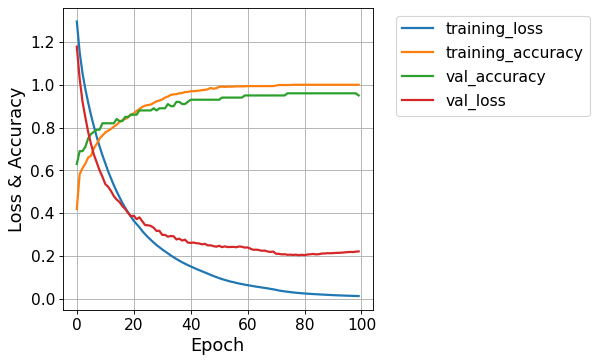

In [105]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 64

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu',input_shape=(900,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax')
])


dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
dense_model.summary()              

history=dense_model.fit(train_dataset,validation_data=val_dataset, epochs=100,verbose=1)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5),dpi=80)
ax = fig.add_subplot(111)
ax.plot(history.history['loss'], linewidth=2)
ax.plot(history.history['accuracy'],linewidth=2)
ax.plot(history.history['val_accuracy'],linewidth=2)
ax.plot(history.history['val_loss'],linewidth=2)
ax.grid(True)
ax.set_ylabel('Loss & Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.legend(['training_loss', 'training_accuracy', 'val_accuracy', 'val_loss'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating dense_model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")

plt.show()

In [106]:
dense_model.evaluate(x_test, y_test, verbose=1)

4/4 [==============================] - 0s 1ms/step - loss: 0.2777 - accuracy: 0.9500


[0.27769792079925537, 0.949999988079071]

## MLTK Library for profiling the tflite models.
    It is really useful for calculating number of operations, required memory, CPU cycle etc.

In [9]:
# Import the standard Python packages used by the examples
import os
import urllib
import shutil
import tempfile

# Import the necessary MLTK APIs
from mltk.core import profile_model
from mltk.utils.commander import query_platform

### Profile Dense Model

In [10]:
tflite_path = './dense_model.tflite'

# Profile the tflite model using the "basic simulator"
# NOTE: Update tflite_path to point to your model if necessary
profiling_results = profile_model(tflite_path)

# Print the profiling results
print(profiling_results)

Profiling Summary
Name: dense_model
Accelerator: None
Input Shape: 1x900x1
Input Data Type: float32
Output Shape: 1x4
Output Data Type: float32
Flash, Model File Size (bytes): 17.5k
RAM, Runtime Memory Size (bytes): 59.7k
Operation Count: 123.8k
Multiply-Accumulate Count: 45.7k
Layer Count: 16
Unsupported Layer Count: 0
CPU Cycle Count: 1.5M
CPU Utilization (%): 0.0
Clock Rate (hz): 78.0M
Energy (J): 119.6u
J/Op: 966.0p
J/MAC: 2.6n

Model Layers
+-------+-----------------+-------+--------+------------+------------+---------------------+--------------+-----------------------------------------------------+
| Index | OpCode          | # Ops | # MACs | CPU Cycles | Energy (J) | Input Shape         | Output Shape | Options                                             |
+-------+-----------------+-------+--------+------------+------------+---------------------+--------------+-----------------------------------------------------+
| 0     | expand_dims     | 0     | 0      | 0          | 0     

### Quantized model profiling

In [34]:
tflite_path = './dense_model_quantized.tflite'

# Profile the tflite model using the "basic simulator"
# NOTE: Update tflite_path to point to your model if necessary
profiling_results = profile_model(tflite_path)

# Print the profiling results
print(profiling_results)

Profiling Summary
Name: dense_model_quantized
Accelerator: None
Input Shape: 1x900
Input Data Type: float32
Output Shape: 1x4
Output Data Type: float32
Flash, Model File Size (bytes): 13.8k
RAM, Runtime Memory Size (bytes): 5.7k
Operation Count: 25.4k
Multiply-Accumulate Count: 10.9k
Layer Count: 6
Unsupported Layer Count: 0
CPU Cycle Count: 84.7k
CPU Utilization (%): 0.0
Clock Rate (hz): 78.0M
Energy (J): 891.4n
J/Op: 35.1p
J/MAC: 82.1p

Model Layers
+-------+-----------------+-------+--------+------------+------------+-----------------+--------------+---------------------+
| Index | OpCode          | # Ops | # MACs | CPU Cycles | Energy (J) | Input Shape     | Output Shape | Options             |
+-------+-----------------+-------+--------+------------+------------+-----------------+--------------+---------------------+
| 0     | quantize        | 3.6k  | 0      | 33.1k      | 422.4n     | 1x900           | 1x900        | Type=none           |
| 1     | fully_connected | 21.6k | 10.8

## Let's Try Input as 2 vector input : Corresponding 1st row as DAP and 2nd ROW as DML

In [8]:
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# root_dir = 'C:/Users/101/repos/postural_sway_analysis/data/'

classes = ['Stab_standing','Stab_AP','Stab_ML','Stab_Instabile']

min_len = 450
input_data = []
output_data = []
min_file_name = ''
for filename in glob.iglob('./data/Case_*/**/*.txt', recursive=True):
    # print(filename)
    temp_data = np.loadtxt(filename)
    temp_data = temp_data[:min_len]
    if classes[0] in filename:
        stab_standing = temp_data
        output_data = np.append(output_data, [0])
    if classes[1] in filename:
        stab_ap = temp_data
        output_data = np.append(output_data, [1])
    if classes[2] in filename:
        stab_ml = temp_data
        output_data = np.append(output_data, [2])
    if classes[3] in filename:
        stab_instabile = temp_data
        output_data = np.append(output_data, [3])
    temp_data = np.transpose(temp_data)
    input_data.append(temp_data)
input_data = np.array(input_data)
print(f"Input data shape  : {input_data.shape}")
print(f"Output data shape : {output_data.shape}")

Input data shape  : (1000, 2, 450)
Output data shape : (1000,)


### Train, test and validation split

In [9]:
x_data = input_data
y_data = output_data
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# split into train test sets
x_train, x_val_to_use, y_train, y_val_to_use = train_test_split(x_data, y_data, test_size=0.3,random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_val_to_use, y_val_to_use, test_size=0.5,random_state=SEED)

print(f" {len(x_train), len(x_val), len(x_test)}")
print(f" {len(y_train), len(y_val), len(y_test)}")

 (700, 150, 150)
 (700, 150, 150)


### Dense Model with 2 vector DAP & DML  inputs

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 2, 12)             5412      
                                                                 
 dense_63 (Dense)            (None, 2, 4)              52        
                                                                 
 flatten_2 (Flatten)         (None, 8)                 0         
                                                                 
 dense_64 (Dense)            (None, 4)                 36        
                                                                 
Total params: 5,500
Trainable params: 5,500
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
22/22 [==============================] - 1s 5ms/step - loss: 1.2547 - accuracy: 0.5229 - val_loss: 1.1787 - val_accuracy: 0.6067
Epoch 2/100
22/22 [=======================

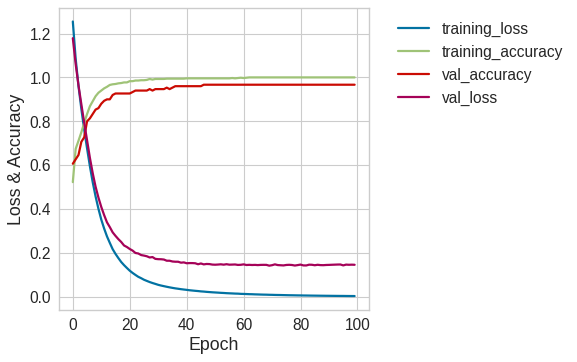

In [52]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu',input_shape=(2,450)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation='softmax')
])


dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
dense_model.summary()              

history=dense_model.fit(train_dataset,validation_data=val_dataset, epochs=100,verbose=1)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5),dpi=80)
ax = fig.add_subplot(111)
ax.plot(history.history['loss'], linewidth=2)
ax.plot(history.history['accuracy'],linewidth=2)
ax.plot(history.history['val_accuracy'],linewidth=2)
ax.plot(history.history['val_loss'],linewidth=2)
ax.grid(True)
ax.set_ylabel('Loss & Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.legend(['training_loss', 'training_accuracy', 'val_accuracy', 'val_loss'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating dense_model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")

plt.show()

### PYCARET - AUTO ML CLASSIFICATION TEST

In [15]:
from pycaret.classification import *
x_data = x_data.reshape(x_data.shape[0], x_data.shape[1]*x_data.shape[2])
s = setup(x_data, target = y_data)

In [16]:
best = compare_models()

\
                                                 
Initiated  . . . . . . . . . . . . . . . . . .   
Status     . . . . . . . . . . . . . . . . . .   
Estimator  . . . . . . . . . . . . . . . . . .   

                                            
                                            
Initiated                         11:23:58  
Status                    Fitting 10 Folds  
Estimator  Light Gradient Boosting Machine

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

KeyboardInterrupt: 

## Case based split for 2 vector input

In [152]:
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# root_dir = 'C:/Users/101/repos/postural_sway_analysis/data/'

classes = ['Stab_standing','Stab_AP','Stab_ML','Stab_Instabile']

min_len = 450
input_data = []
output_data = []
test_x = []
test_y = []
min_file_name = ''
for filename in glob.iglob('./data/Case_*/**/*.txt', recursive=True):
    # print(filename)
    temp_data = np.loadtxt(filename)
    temp_data = temp_data[:min_len]
    if "Case_3" in filename:
        test_x.append(np.transpose(temp_data))
        if classes[0] in filename:
            test_y.append(0)
        if classes[1] in filename:
            test_y.append(1)
        if classes[2] in filename:
            test_y.append(2)
        if classes[3] in filename:
            test_y.append(3)
        continue
    if classes[0] in filename:
        stab_standing = temp_data
        output_data = np.append(output_data, [0])
    if classes[1] in filename:
        stab_ap = temp_data
        output_data = np.append(output_data, [1])
    if classes[2] in filename:
        stab_ml = temp_data
        output_data = np.append(output_data, [2])
    if classes[3] in filename:
        stab_instabile = temp_data
        output_data = np.append(output_data, [3])
    temp_data = np.transpose(temp_data)
    input_data.append(temp_data)
test_x = np.array(test_x)
test_y = np.array(test_y, dtype=int)
input_data = np.array(input_data)
print(f"Input data shape  : {input_data.shape}")
print(f"Output data shape : {output_data.shape}")
print(f"Test data shape   : {test_x.shape}")
print(f"Test label shape  : {test_y.shape}")

Input data shape  : (800, 2, 450)
Output data shape : (800,)
Test data shape   : (200, 2, 450)
Test label shape  : (200,)


### Split data into train, test and validation

In [153]:
## Split the data into train and test
from sklearn.model_selection import train_test_split
x_train = input_data
y_train = output_data
x_val, x_test, y_val, y_test = train_test_split(test_x, test_y, test_size=0.5)
print(f" {len(x_train), len(x_val), len(x_test)}")
print(f" {len(y_train), len(y_test), len(y_test)}")

 (800, 100, 100)
 (800, 100, 100)


### Dense Model with 2 vector DAP & DML  inputs - Case based split

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_138 (Dense)           (None, 2, 12)             5412      
                                                                 
 dense_139 (Dense)           (None, 2, 4)              52        
                                                                 
 flatten_36 (Flatten)        (None, 8)                 0         
                                                                 
 dense_140 (Dense)           (None, 4)                 36        
                                                                 
Total params: 5,500
Trainable params: 5,500
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 1s 8ms/step - loss: 1.2962 - accuracy: 0.4538 - val_loss: 1.1963 - val_accuracy: 0.6300
Epoch 2/100
13/13 [=======================

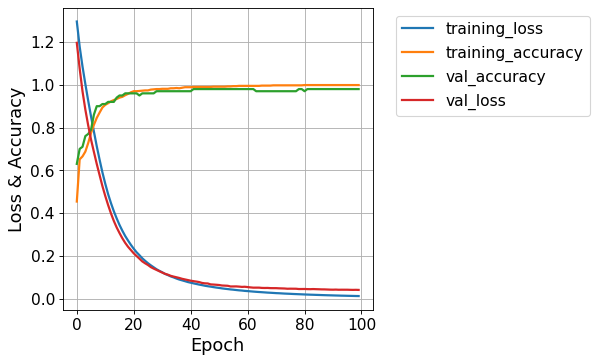

In [154]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 64

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=128)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=128)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu',input_shape=(2,450)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation='softmax')
])


dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
dense_model.summary()              

history=dense_model.fit(train_dataset,validation_data=val_dataset, epochs=100,verbose=1)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5),dpi=80)
ax = fig.add_subplot(111)
ax.plot(history.history['loss'], linewidth=2)
ax.plot(history.history['accuracy'],linewidth=2)
ax.plot(history.history['val_accuracy'],linewidth=2)
ax.plot(history.history['val_loss'],linewidth=2)
ax.grid(True)
ax.set_ylabel('Loss & Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.legend(['training_loss', 'training_accuracy', 'val_accuracy', 'val_loss'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating dense_model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")

plt.show()

In [155]:
dense_model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.0473 - accuracy: 0.9900


[0.04725451022386551, 0.9900000095367432]

### Try same data with CNN model

Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_37 (Conv1D)          (None, 2, 8)              7208      
                                                                 
 activation_29 (Activation)  (None, 2, 8)              0         
                                                                 
 conv1d_38 (Conv1D)          (None, 2, 4)              68        
                                                                 
 activation_30 (Activation)  (None, 2, 4)              0         
                                                                 
 flatten_37 (Flatten)        (None, 8)                 0         
                                                                 
 dense_141 (Dense)           (None, 12)                108       
                                                                 
 dense_142 (Dense)           (None, 8)                 10

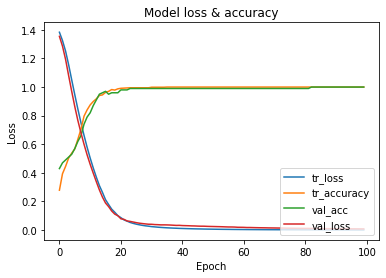

In [156]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 64

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=128)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=128)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))
model = tf.keras.Sequential(name='cnn_model')
model.add(tf.keras.layers.InputLayer(input_shape=(2,450)))
model.add(tf.keras.layers.Conv1D(8,2, padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv1D(4,2, padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(12))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

print(model.summary())
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=100, validation_data=val_dataset, verbose=1)   


# Plotting accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])


plt.title('Model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['tr_loss', 'tr_accuracy', 'val_acc', 'val_loss'], loc='lower right')
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")


plt.show()

In [147]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 1.2966 - accuracy: 0.8700


[1.2966058254241943, 0.8700000047683716]

## Let's try SKLEARN Random Forest and Emlearn library for deployment

In [14]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(n_estimators=5, max_depth=10, random_state=0)
# x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
# x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
estimator.fit(x_train, y_train)
estimator.score(x_test, y_test)

0.98

### Convert it to header file using emlearn library

In [5]:
import emlearn
cmodel = emlearn.convert(estimator, method='inline')
cmodel.save(file='my-test.h')

In file included from tmp/myinlinetree.c:2:
tmp/myinlinetree.h:8:5: warning: overflow in conversion from ‘int’ to ‘signed char’ changes value from ‘484’ to ‘-28’ [-Woverflow]
    8 |   { 484, -0.007702185306698084, 1, 11 },
      |     ^~~
tmp/myinlinetree.h:10:5: warning: overflow in conversion from ‘int’ to ‘signed char’ changes value from ‘675’ to ‘-93’ [-Woverflow]
   10 |   { 675, 0.24414151161909103, 3, 4 },
      |     ^~~
tmp/myinlinetree.h:18:5: warning: overflow in conversion from ‘int’ to ‘signed char’ changes value from ‘678’ to ‘-90’ [-Woverflow]
   18 |   { 678, 0.0975034087896347, 3, 4 },
      |     ^~~
tmp/myinlinetree.h:19:5: warning: overflow in conversion from ‘int’ to ‘signed char’ changes value from ‘481’ to ‘-31’ [-Woverflow]
   19 |   { 481, 0.0414523184299469, 12, 41 },
      |     ^~~
tmp/myinlinetree.h:20:5: warning: overflow in conversion from ‘int’ to ‘signed char’ changes value from ‘399’ to ‘-113’ [-Woverflow]
   20 |   { 399, 0.10727360472083092, 13, 35 

'\n    // !!! This file is generated using emlearn !!!\n\n    #include <eml_trees.h>\n    \n\nEmlTreesNode my-test_nodes[208] = {\n  { 484, -0.007702185306698084, 1, 11 },\n  { 9, -0.07476218044757843, 2, 5 },\n  { 675, 0.24414151161909103, 3, 4 },\n  { -1, 3, -1, -1 },\n  { -1, 2, -1, -1 },\n  { 14, 0.08195648714900017, 6, 10 },\n  { 101, 0.17255660519003868, 7, 3 },\n  { 95, -0.15228596329689026, 3, 8 },\n  { 153, 0.08024338260293007, 4, 9 },\n  { -1, 0, -1, -1 },\n  { 678, 0.0975034087896347, 3, 4 },\n  { 481, 0.0414523184299469, 12, 41 },\n  { 399, 0.10727360472083092, 13, 35 },\n  { 305, 0.11034835875034332, 14, 27 },\n  { 198, 0.13261503726243973, 15, 25 },\n  { 892, -0.017380392644554377, 16, 17 },\n  { 166, 0.2606637515127659, 4, 3 },\n  { 705, -0.013058623066172004, 18, 19 },\n  { 396, -0.057050833478569984, 3, 4 },\n  { 405, -0.0006814994267188013, 20, 23 },\n  { 355, 0.20455097407102585, 21, 3 },\n  { 628, -0.04278549598529935, 4, 22 },\n  { -1, 1, -1, -1 },\n  { 436, 0.1532

In [65]:
import emlearn
print(emlearn.includedir)

/home/veysiadn/anaconda3/lib/python3.9/site-packages/emlearn


In [27]:
print(x_test[0])

[-0.44618714  0.25559005  0.21806262  0.25512227  0.27173457  0.36790705
  0.38412112  0.36333388  0.34644294  0.39875942  0.38573113  0.30471265
  0.38895804  0.3836807   0.41528833  0.41419184  0.39854285  0.37805247
  0.39843586  0.3300911   0.3809844   0.52401674  0.2873018   0.37501842
  0.37403062  0.4374031   0.3468364   0.3632935   0.34201065  0.34281415
  0.3530596   0.30610153  0.34375894  0.2647036   0.25198984  0.23978303
  0.24795893  0.24289636  0.20484747  0.20528577  0.16801237  0.15115447
  0.1480764  -0.45726267 -0.4505978  -0.4195635  -0.42000914 -0.4321866
 -0.42587844 -0.42563453 -0.39316267 -0.36739713 -0.3706564  -0.3406611
 -0.31479368 -0.300859   -0.2835152  -0.23496187 -0.25088957 -0.24789216
 -0.21507493 -0.19390798 -0.17050387 -0.16315326 -0.13724065 -0.11096714
 -0.08437268 -0.05473755 -0.03812559 -0.04851856 -0.00501184 -0.00996306
  0.01857807  0.05119725  0.10712849  0.13399357  0.17621037  0.20213625
  0.21274742  0.22788306  0.23291452  0.25281894  0.2

In [7]:
print(y_test[0])

3.0


In [9]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=5,random_state=0)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

1.0

In [11]:
cmodel=0

In [15]:
import emlearn
cmodel = emlearn.convert(clf, method='inline')
cmodel.save(file='extra_tree_clf_postural_sway.h')

KeyboardInterrupt: 

## Let's try to decrease prediction window from 4.5 seconds to 1 second

In [6]:
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# root_dir = 'C:/Users/101/repos/postural_sway_analysis/data/'

classes = ['Stab_standing','Stab_AP','Stab_ML','Stab_Instabile']

min_len = 100
input_data = np.zeros((1,min_len*2))
output_data = []
min_file_name = ''
filenames = []
for filename in glob.iglob('./data/Case_*/**/*.txt', recursive=True):
    # print(filename)
    temp_data = np.loadtxt(filename)
    filenames.append(filename)
    for i in range(int(temp_data.shape[0]/100)):
        concat_data = temp_data[min_len*i:min_len*(i+1)]
        temp2_data = temp_data[min_len*(i+1):min_len*(i+2)]
        concat_data = np.concatenate((concat_data[:,0],concat_data[:,1]), axis=0)
        if classes[0] in filename:
            stab_standing = temp2_data
            output_data = np.append(output_data, 0)
        if classes[1] in filename:
            stab_ap = temp2_data
            output_data = np.append(output_data, 1)
        if classes[2] in filename:
            stab_ml = temp2_data
            output_data = np.append(output_data, 2)
        if classes[3] in filename:
            stab_instabile = temp2_data
            output_data = np.append(output_data, 3)
        concat_data = np.reshape(concat_data, (1,concat_data.shape[0]))    
        input_data = np.append(input_data, concat_data,axis=0)
        input_data = np.float32(input_data)
input_data = np.delete(input_data, 0, axis=0)
print(f"Input data shape  : {input_data.shape}")
print(f"Output data shape : {output_data.shape}")

Input data shape  : (4832, 200)
Output data shape : (4832,)


### Train, test and validation split

In [9]:
x_data = input_data
y_data = output_data
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# split into train test sets
x_train, x_val_to_use, y_train, y_val_to_use = train_test_split(x_data, y_data, test_size=0.3,random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_val_to_use, y_val_to_use, test_size=0.5,random_state=SEED)
# x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3,random_state=SEED)

print(f" {len(x_train), len(x_val), len(x_test)}")
print(f" {len(y_train), len(y_val), len(y_test)}")

 (3382, 725, 725)
 (3382, 725, 725)


0.9820689655172414
              precision    recall  f1-score   support

         0.0     0.9834    0.9674    0.9753       184
         1.0     0.9613    0.9943    0.9775       175
         2.0     1.0000    0.9718    0.9857       177
         3.0     0.9843    0.9947    0.9895       189

    accuracy                         0.9821       725
   macro avg     0.9823    0.9820    0.9820       725
weighted avg     0.9824    0.9821    0.9821       725



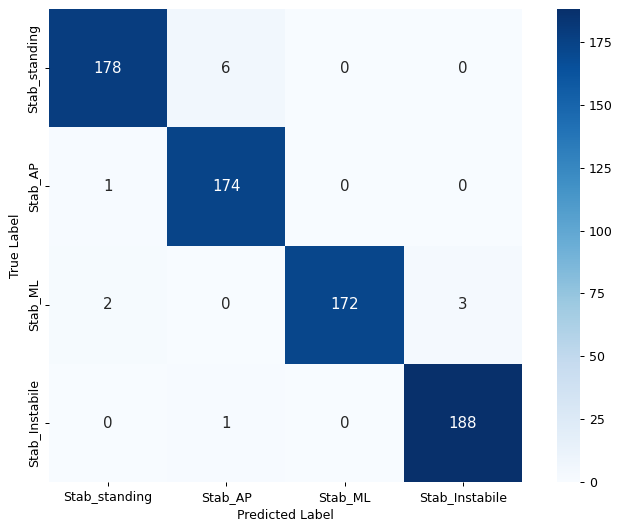

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(
                      min_samples_split=3,
                      n_estimators=5,
                      bootstrap=True,
                      n_jobs=-1,
                      random_state=0,
                      max_features='sqrt')

rf_classifier.fit(x_train, y_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = rf_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
plt.figure(figsize=(8,6), dpi=90)

ax=plt.subplot(111)
# plt.title("Confusion Matrix", fontsize=15)
labels = classes
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 12},ax=ax, square=True)
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticklabels(labels, fontsize=10)
ax.set_xlabel("Predicted Label", fontsize=10)
ax.set_ylabel("True Label", fontsize=10)
# ax.patch.set_edgecolor('black')
# ax.patch.set_linewidth('2')
plt.tight_layout()
import sklearn.metrics as metrics

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred,digits=4))


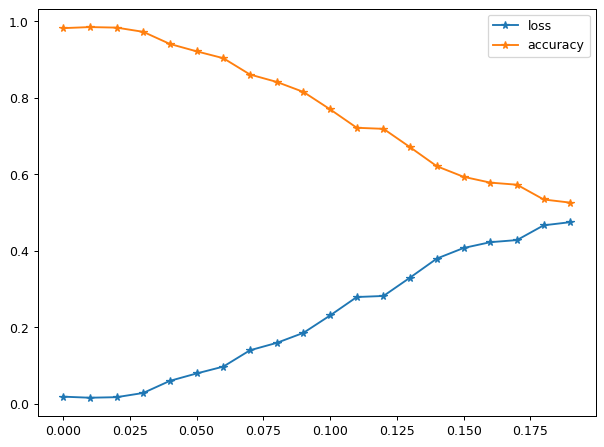

In [17]:
def add_noise(x, noise_factor):
    x = x + noise_factor * tf.random.normal(shape=x.shape)
    return x
noises=[]
losses=[]
accuracies=[]
for i in range(20):
    noisy_x_train = add_noise(x_train, i/100)
    noisy_x_test = add_noise(x_test, i/100)
    rf_classifier.fit(noisy_x_train, y_train)
    y_pred = rf_classifier.predict(noisy_x_test)
    noises.append(i/100)
    losses.append(metrics.hamming_loss(y_test, y_pred))
    accuracies.append(metrics.accuracy_score(y_test, y_pred))
plt.figure(figsize=(8,6), dpi=90)
plt.plot(noises, losses, '-*', label='loss')
plt.plot(noises, accuracies, '-*', label='accuracy')
plt.legend()
plt.show()

rf_losses = losses
rf_accuracies = accuracies

In [62]:
print(classes)

['Stab_standing', 'Stab_AP', 'Stab_ML', 'Stab_Instabile']


### Try a dense model for 1x200 input size : DAP and DML concatenated

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 12)                2412      
                                                                 
 dense_69 (Dense)            (None, 4)                 52        
                                                                 
 dense_70 (Dense)            (None, 4)                 20        
                                                                 
Total params: 2,484
Trainable params: 2,484
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
106/106 [==============================] - 1s 2ms/step - loss: 1.1937 - accuracy: 0.4805 - val_loss: 1.0320 - val_accuracy: 0.5959
Epoch 2/100
106/106 [==============================] - 0s 1ms/step - loss: 0.9309 - accuracy: 0.6236 - val_loss: 0.7896 - val_accuracy: 0.6910
Epoch 3/100
106/106 [========

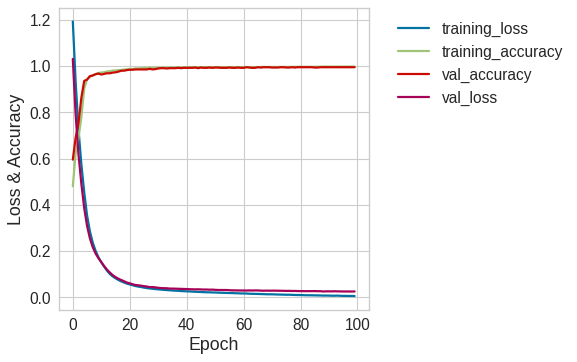

In [57]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 32

train_dataset = tf.data.DSataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu',input_shape=(200,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax')
])


dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
dense_model.summary()              

history=dense_model.fit(train_dataset,validation_data=val_dataset, epochs=100,verbose=1)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5),dpi=80)
ax = fig.add_subplot(111)
ax.plot(history.history['loss'], linewidth=2)
ax.plot(history.history['accuracy'],linewidth=2)
ax.plot(history.history['val_accuracy'],linewidth=2)
ax.plot(history.history['val_loss'],linewidth=2)
ax.grid(True)
ax.set_ylabel('Loss & Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.legend(['training_loss', 'training_accuracy', 'val_accuracy', 'val_loss'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating dense_model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")

plt.show()

In [58]:
dense_model.evaluate(x_test, y_test)

23/23 [==============================] - 0s 768us/step - loss: 0.0671 - accuracy: 0.9862


[0.06714431941509247, 0.9862068891525269]

### Try a Random Forest model for 100 samples

In [59]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(n_estimators=10, max_depth=20)
estimator.fit(x_train, y_train)
estimator.score(x_test, y_test)

0.9875862068965517

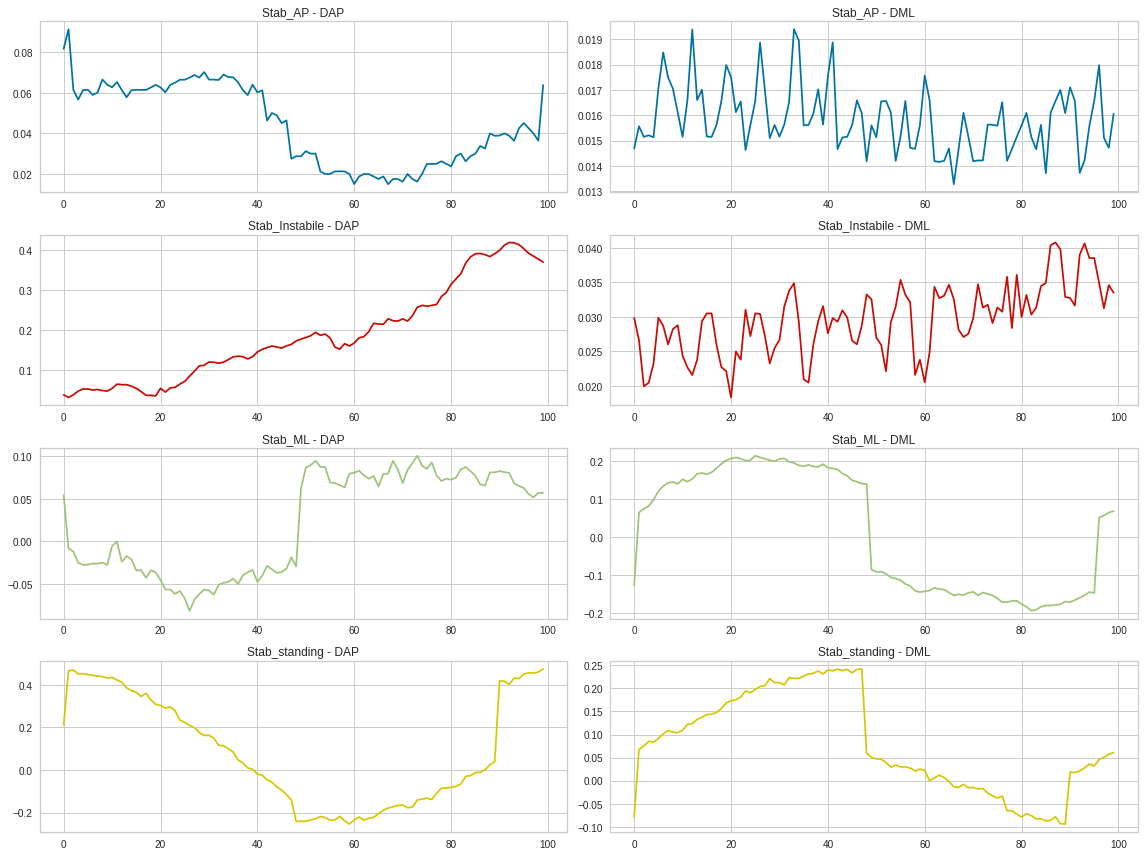

In [24]:
# Plot 2x2 subplots
# %matplotlib
# %matplotlib
fig, axs = plt.subplots(4, 2, figsize=(16,12))
stab_ap_index = np.where(y_test == 0)
stab_instabile_index = np.where(y_test == 1)
stab_ml_index = np.where(y_test == 2)
stab_standing_index = np.where(y_test == 3)
stab_ap = x_test[stab_ap_index]
stab_instabile = x_test[stab_instabile_index]
stab_ml = x_test[stab_ml_index]
stab_standing = x_test[stab_standing_index]

axs[0, 0].plot(stab_ap[0,0:100])
axs[0, 0].set_title('Stab_AP - DAP')

axs[0,1].plot(stab_ap[0,100:200])
axs[0,1].set_title('Stab_AP - DML')

axs[1, 0].plot(stab_instabile[0,0:100], c='r')
axs[1, 0].set_title('Stab_Instabile - DAP')

axs[1,1].plot(stab_instabile[0,100:200], c='r')
axs[1,1].set_title('Stab_Instabile - DML')

axs[2, 0].plot(stab_ml[0,0:100], c='g')
axs[2, 0].set_title('Stab_ML - DAP')

axs[2,1].plot(stab_ml[0,100:200], c='g')
axs[2,1].set_title('Stab_ML - DML')

axs[3, 0].plot(stab_standing[0,0:100], c='y')
axs[3, 0].set_title('Stab_standing - DAP')

axs[3,1].plot(stab_standing[0,100:200], c='y')
axs[3,1].set_title('Stab_standing - DML')
plt.tight_layout()

### PYCARET - AUTO ML CLASSIFICATION TEST

In [27]:
from pycaret.classification import *
s = setup(x_data, target = y_data)

In [28]:
best = compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

## Let's try 2x100 as input 

In [3]:
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# root_dir = 'C:/Users/101/repos/postural_sway_analysis/data/'

classes = ['Stab_standing','Stab_AP','Stab_ML','Stab_Instabile']

min_len = 100
input_data = np.zeros((1,2,min_len))
output_data = []
min_file_name = ''
for filename in glob.iglob('./data/Case_*/**/*.txt', recursive=True):
    # print(filename)
    temp_data = np.loadtxt(filename)
    for i in range(int(temp_data.shape[0]/min_len)):
        concat_data = temp_data[min_len*i:min_len*(i+1)]
        if classes[0] in filename:
            stab_standing = temp_data
            output_data = np.append(output_data, 0)
        if classes[1] in filename:
            stab_ap = temp_data
            output_data = np.append(output_data, 1)
        if classes[2] in filename:
            stab_ml = temp_data
            output_data = np.append(output_data, 2)
        if classes[3] in filename:
            stab_instabile = temp_data
            output_data = np.append(output_data, 3)
        concat_data = np.transpose(concat_data)
        concat_data = np.expand_dims(concat_data, axis=0)
        input_data = np.append(input_data, concat_data,axis=0)
        input_data = np.float32(input_data)
input_data = np.delete(input_data, 0, axis=0)
print(f"Input data shape : {input_data.shape}")
print(f"Output data shape : {output_data.shape}")

Input data shape : (4832, 2, 100)
Output data shape : (4832,)


### Train, test and validation split

In [4]:
x_data = input_data
y_data = output_data
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# split into train test sets
x_train, x_val_to_use, y_train, y_val_to_use = train_test_split(x_data, y_data, test_size=0.3,random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_val_to_use, y_val_to_use, test_size=0.5,random_state=SEED)

print(f" {len(x_train), len(x_val), len(x_test)}")
print(f" {len(y_train), len(y_val), len(y_test)}")

 (3382, 725, 725)
 (3382, 725, 725)


### Dense Model with 2x100 vector DAP & DML  inputs

In [5]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu',input_shape=(2,min_len)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation='softmax')
])


dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
dense_model.summary()              

history=dense_model.fit(train_dataset,validation_data=val_dataset, epochs=100,verbose=1)


import matplotlib
## use tkagg backend for interactive plot
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5),dpi=80)
ax = fig.add_subplot(111)
ax.plot(history.history['loss'], linewidth=2)
ax.plot(history.history['accuracy'],linewidth=2)
ax.plot(history.history['val_accuracy'],linewidth=2)
ax.plot(history.history['val_loss'],linewidth=2)
ax.grid(True)
ax.set_ylabel('Loss & Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.legend(['training_loss', 'training_accuracy', 'val_accuracy', 'val_loss'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating dense_model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")

plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2, 12)             1212      
                                                                 
 dense_1 (Dense)             (None, 2, 4)              52        
                                                                 
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
Total params: 1,300
Trainable params: 1,300
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


2023-03-07 16:02:24.369379: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


106/106 [==============================] - 1s 2ms/step - loss: 1.1577 - accuracy: 0.6251 - val_loss: 0.9520 - val_accuracy: 0.7766
Epoch 2/100
106/106 [==============================] - 0s 1ms/step - loss: 0.7607 - accuracy: 0.8575 - val_loss: 0.5900 - val_accuracy: 0.9159
Epoch 3/100
106/106 [==============================] - 0s 1ms/step - loss: 0.4627 - accuracy: 0.9258 - val_loss: 0.3658 - val_accuracy: 0.9434
Epoch 4/100
106/106 [==============================] - 0s 1ms/step - loss: 0.2904 - accuracy: 0.9524 - val_loss: 0.2382 - val_accuracy: 0.9572
Epoch 5/100
106/106 [==============================] - 0s 1ms/step - loss: 0.1987 - accuracy: 0.9645 - val_loss: 0.1724 - val_accuracy: 0.9614
Epoch 6/100
106/106 [==============================] - 0s 1ms/step - loss: 0.1514 - accuracy: 0.9690 - val_loss: 0.1351 - val_accuracy: 0.9669
Epoch 7/100
106/106 [==============================] - 0s 2ms/step - loss: 0.1233 - accuracy: 0.9731 - val_loss: 0.1125 - val_accuracy: 0.9779
Epoch 8/100

Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/veysiadn/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/home/veysiadn/anaconda3/lib/python3.9/tkinter/__init__.py", line 814, in callit
    func(*args)
  File "/home/veysiadn/anaconda3/lib/python3.9/site-packages/matplotlib/backends/_backend_tk.py", line 537, in delayed_destroy
    self.window.destroy()
  File "/home/veysiadn/anaconda3/lib/python3.9/tkinter/__init__.py", line 2312, in destroy
    self.tk.call('destroy', self._w)
_tkinter.TclError: can't invoke "destroy" command: application has been destroyed


In [46]:
dense_model.evaluate(x_test, y_test)

23/23 [==============================] - 0s 971us/step - loss: 0.0413 - accuracy: 0.9917


[0.04126981645822525, 0.9917241334915161]

## Add noise to the data and try again

In [6]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

## Add random gaussian noise to the input data
noise_factor = 0.1
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_val_noisy = x_val + noise_factor * tf.random.normal(shape=x_val.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)


train_dataset = tf.data.Dataset.from_tensor_slices((x_train_noisy, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val_noisy, y_val))
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train_noisy, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val_noisy, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu',input_shape=(2,min_len)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation='softmax')
])


## Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    mode='auto',
    restore_best_weights=True)



dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
dense_model.summary()              

history=dense_model.fit(train_dataset,validation_data=val_dataset, epochs=100,verbose=1,callbacks=[early_stopping])

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5),dpi=80)
ax = fig.add_subplot(111)
ax.plot(history.history['loss'], linewidth=2)
ax.plot(history.history['accuracy'],linewidth=2)
ax.plot(history.history['val_accuracy'],linewidth=2)
ax.plot(history.history['val_loss'],linewidth=2)
ax.grid(True)
ax.set_ylabel('Loss & Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.legend(['training_loss', 'training_accuracy', 'val_accuracy', 'val_loss'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating dense_model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")

plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2, 12)             1212      
                                                                 
 dense_4 (Dense)             (None, 2, 4)              52        
                                                                 
 flatten_1 (Flatten)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 4)                 36        
                                                                 
Total params: 1,300
Trainable params: 1,300
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
106/106 [==============================] - 1s 2ms/step - loss: 1.3119 - accuracy: 0.4012 - val_loss: 1.2364 - val_accuracy: 0.4703
Epoch 2/100
106/106 [====================

In [7]:
dense_model.evaluate(x_test_noisy, y_test)

23/23 [==============================] - 0s 1ms/step - loss: 0.0957 - accuracy: 0.9697


[0.0956997349858284, 0.9696551561355591]

### Try CNN Model

Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_45 (Conv1D)          (None, 2, 8)              3208      
                                                                 
 activation_32 (Activation)  (None, 2, 8)              0         
                                                                 
 conv1d_46 (Conv1D)          (None, 2, 4)              132       
                                                                 
 activation_33 (Activation)  (None, 2, 4)              0         
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 1, 4)             0         
 g1D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 4)                 0         
                                                         

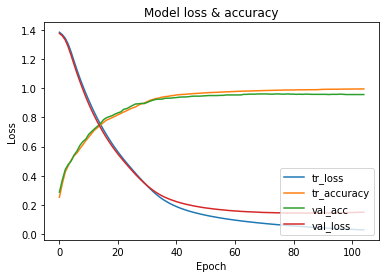

In [45]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

## Add random gaussian noise to the input data
noise_factor = 0.1
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_val_noisy = x_val + noise_factor * tf.random.normal(shape=x_val.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)


train_dataset = tf.data.Dataset.from_tensor_slices((x_train_noisy, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val_noisy, y_val))
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train_noisy, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=128)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val_noisy, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=128)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

model = tf.keras.Sequential(name='cnn_model')
model.add(tf.keras.layers.InputLayer(input_shape=(2,100)))
model.add(tf.keras.layers.Conv1D(8,4, padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv1D(4,4, padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling1D(2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(12))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

print(model.summary())


## Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    verbose=1,
    mode='auto',
    restore_best_weights=True)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=200, validation_data=val_dataset, verbose=1, callbacks=[early_stopping])   


# Plotting accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])


plt.title('Model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['tr_loss', 'tr_accuracy', 'val_acc', 'val_loss'], loc='lower right')
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")


plt.show()

0.9889655172413793
              precision    recall  f1-score   support

         0.0     0.9784    0.9837    0.9810       184
         1.0     0.9886    0.9943    0.9915       175
         2.0     0.9943    0.9774    0.9858       177
         3.0     0.9947    1.0000    0.9974       189

    accuracy                         0.9890       725
   macro avg     0.9890    0.9888    0.9889       725
weighted avg     0.9890    0.9890    0.9890       725



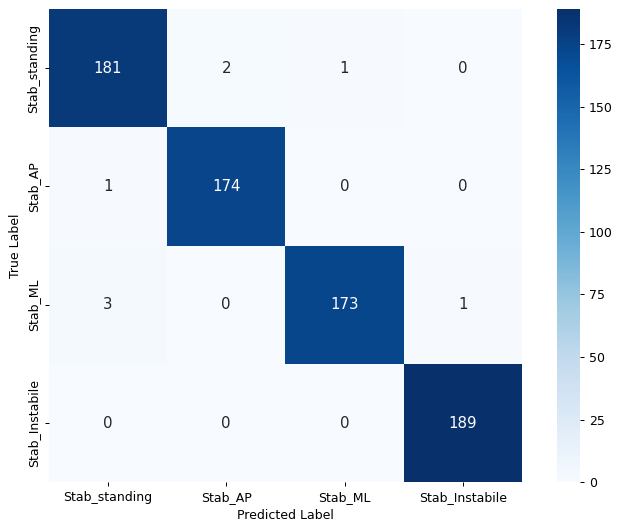

In [8]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
noise_factor = 0.1
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_val_noisy = x_val + noise_factor * tf.random.normal(shape=x_val.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(
                      min_samples_split=3,
                      n_estimators=5,
                      bootstrap=True,
                      n_jobs=-1,
                      random_state=0,
                      max_features='sqrt')

rf_train_data = x_train.reshape(x_train.shape[0], -1)
rf_val_data = x_val.reshape(x_val.shape[0], -1)
rf_test_data = x_test.reshape(x_test.shape[0], -1)
## Combine the training and validation data
rf_train_data = np.concatenate((rf_train_data, rf_val_data), axis=0)
rf_y_train = np.concatenate((y_train, y_val), axis=0)



rf_classifier.fit(rf_train_data, rf_y_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = rf_classifier.predict(rf_test_data)
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
plt.figure(figsize=(8,6), dpi=90)

ax=plt.subplot(111)
# plt.title("Confusion Matrix", fontsize=15)
labels = classes
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 12},ax=ax, square=True)
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticklabels(labels, fontsize=10)
ax.set_xlabel("Predicted Label", fontsize=10)
ax.set_ylabel("True Label", fontsize=10)
# ax.patch.set_edgecolor('black')
# ax.patch.set_linewidth('2')
plt.tight_layout()
import sklearn.metrics as metrics

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred,digits=4))


0.9875862068965517
              precision    recall  f1-score   support

         0.0     0.9786    0.9946    0.9865       184
         1.0     0.9886    0.9943    0.9915       175
         2.0     0.9942    0.9718    0.9829       177
         3.0     0.9894    0.9894    0.9894       189

    accuracy                         0.9876       725
   macro avg     0.9877    0.9875    0.9876       725
weighted avg     0.9877    0.9876    0.9876       725



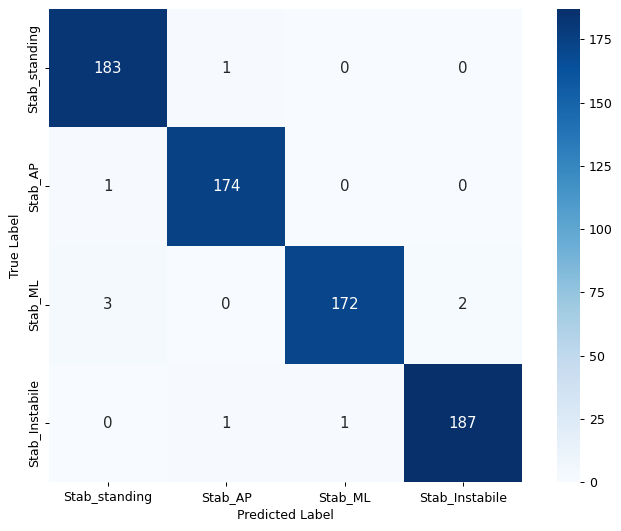

In [9]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()


from sklearn.ensemble import ExtraTreesClassifier
et_classifier = ExtraTreesClassifier(
                      min_samples_split=3,
                      n_estimators=5,
                      bootstrap=True,
                      n_jobs=-1,
                      random_state=0,
                      max_features='sqrt')

rf_train_data = x_train.reshape(x_train.shape[0], -1)
rf_val_data = x_val.reshape(x_val.shape[0], -1)
rf_test_data = x_test.reshape(x_test.shape[0], -1)
## Combine the training and validation data
rf_train_data = np.concatenate((rf_train_data, rf_val_data), axis=0)
rf_y_train = np.concatenate((y_train, y_val), axis=0)



et_classifier.fit(rf_train_data, rf_y_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = et_classifier.predict(rf_test_data)
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
plt.figure(figsize=(8,6), dpi=90)

ax=plt.subplot(111)
# plt.title("Confusion Matrix", fontsize=15)
labels = classes
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 12},ax=ax, square=True)
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticklabels(labels, fontsize=10)
ax.set_xlabel("Predicted Label", fontsize=10)
ax.set_ylabel("True Label", fontsize=10)
# ax.patch.set_edgecolor('black')
# ax.patch.set_linewidth('2')
plt.tight_layout()
import sklearn.metrics as metrics

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred,digits=4))


In [10]:
# Support Vector Machine (SVM)
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split, cross_val_score
svm_train_data = x_train.reshape(x_train.shape[0], -1)
svm_val_data = x_val.reshape(x_val.shape[0], -1)
svm_test_data = x_test.reshape(x_test.shape[0], -1)
## concatenate train and validation data
svm_train_data = np.concatenate((svm_train_data, svm_val_data), axis=0)
svm_y_train = np.concatenate((y_train, y_val), axis=0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(C=10, kernel = 'rbf', random_state = 0)
classifier.fit(svm_train_data, svm_y_train)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, svm_train_data, svm_y_train, cv=10)
print(scores,scores.mean())

import joblib
# Save the model as a pickle in a file
joblib.dump(classifier, 'SVM.pkl') 
# Load the pickled model
Test_Classifier = joblib.load('SVM.pkl') 

# Predicting the Test set results
y_pred = Test_Classifier.predict(svm_test_data)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("The accuracy of the model is  {} %".format(str(round(accuracy_score(y_test,y_pred),4)*100)))

[0.98783455 0.99756691 0.99513382 0.97810219 0.99270073 0.99026764
 0.99270073 0.98292683 0.98780488 0.9902439 ] 0.9895282179099164
[[184   0   0   0]
 [  1 174   0   0]
 [  5   0 172   0]
 [  0   1   1 187]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       184
         1.0       0.99      0.99      0.99       175
         2.0       0.99      0.97      0.98       177
         3.0       1.00      0.99      0.99       189

    accuracy                           0.99       725
   macro avg       0.99      0.99      0.99       725
weighted avg       0.99      0.99      0.99       725

The accuracy of the model is  98.9 %


### Combine SVM, RF and MLP for classification

23/23 [==============================] - 0s 824us/step


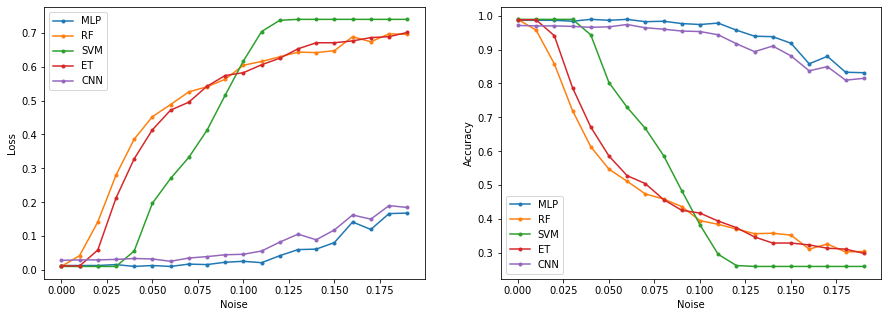

In [46]:
## Add random gaussian noise to the input data starting from 0 to 0.1 and test the model
def add_noise(x, noise_factor):
    x = x + noise_factor * tf.random.normal(shape=x.shape)
    return x
noises=[]
mlp_losses=[]
mlp_accuracies=[]
rf_losses=[]
rf_accuracies=[]
svm_losses=[]
svm_accuracies=[]
et_losses=[]
et_accuracies=[]
cnn_losses=[]
cnn_accuracies=[]
for i in range(20):
    noisy_x_test = add_noise(x_test, i/100)
    x, test_acc = dense_model.evaluate(noisy_x_test, y_test)
    y_pred = dense_model.predict(noisy_x_test)
    y_pred = np.argmax(y_pred, axis=1)
    test_loss = metrics.hamming_loss(y_test, y_pred)
    noises.append(i/100)
    mlp_losses.append(test_loss)
    mlp_accuracies.append(test_acc)
    noisy_rf_test_data = noisy_x_test.reshape(noisy_x_test.shape[0], -1)
    y_pred = rf_classifier.predict(noisy_rf_test_data)
    loss_rf = metrics.hamming_loss(y_test, y_pred)
    rf_losses.append(loss_rf)
    rf_accuracies.append(metrics.accuracy_score(y_test, y_pred))
    y_pred = Test_Classifier.predict(noisy_rf_test_data)
    loss_svm = metrics.hamming_loss(y_test, y_pred)
    svm_losses.append(loss_svm)
    svm_accuracies.append(metrics.accuracy_score(y_test, y_pred))
    y_pred = et_classifier.predict(noisy_rf_test_data)
    loss_et = metrics.hamming_loss(y_test, y_pred)
    et_losses.append(loss_et)
    et_accuracies.append(metrics.accuracy_score(y_test, y_pred))
    x, test_acc = model.evaluate(noisy_x_test, y_test)
    y_pred = model.predict(noisy_x_test)
    y_pred = np.argmax(y_pred, axis=1)
    test_loss = metrics.hamming_loss(y_test, y_pred)
    cnn_losses.append(test_loss)
    cnn_accuracies.append(test_acc)



# Plot the results in subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(noises, mlp_losses,'.-' ,label='MLP')
axs[0].plot(noises, rf_losses, '.-' ,label='RF')
axs[0].plot(noises, svm_losses, '.-' ,label='SVM')
axs[0].plot(noises, et_losses, '.-' ,label='ET')
axs[0].plot(noises, cnn_losses, '.-' ,label='CNN')
axs[0].set_xlabel('Noise')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[1].plot(noises, mlp_accuracies, '.-' ,label='MLP')
axs[1].plot(noises, rf_accuracies, '.-' ,label='RF')
axs[1].plot(noises, svm_accuracies, '.-' ,label='SVM')
axs[1].plot(noises, et_accuracies, '.-' ,label='ET')
axs[1].plot(noises, cnn_accuracies, '.-' ,label='CNN')
axs[1].set_xlabel('Noise')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
plt.show()

### Plot the accuracy and losses of the each model

In [13]:
### Prepare same plot using plotly
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=noises, y=mlp_losses,
                    mode='lines+markers',  
                    name='MLP'))
fig.add_trace(go.Scatter(x=noises, y=rf_losses,
                    mode='lines+markers',  
                    name='RF'))
fig.add_trace(go.Scatter(x=noises, y=svm_losses,   
                    mode='lines+markers',
                    name='SVM'))
fig.add_trace(go.Scatter(x=noises, y=et_losses,
                     mode='lines+markers',
                     name='ET'))

fig.update_layout(title='Loss vs Noise',
                     xaxis_title='Noise',
                        yaxis_title='Loss')
fig.update_layout(template='plotly_dark')
fig.show()
fig = go.Figure()
fig.add_trace(go.Scatter(x=noises, y=mlp_accuracies,
                    mode='lines+markers',
                    name='MLP'))
fig.add_trace(go.Scatter(x=noises, y=rf_accuracies,
                    mode='lines+markers',
                    name='RF'))
fig.add_trace(go.Scatter(x=noises, y=svm_accuracies,
                    mode='lines+markers',
                    name='SVM'))
fig.add_trace(go.Scatter(x=noises, y=et_accuracies,
                     mode='lines+markers',
                     name='ET'))

fig.update_layout(title='Accuracy vs Noise',
                        xaxis_title='Noise',
                        yaxis_title='Accuracy')
## Change the theme to plotly_dark
fig.update_layout(template='plotly_dark')

fig.show()
